In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

https://www.kaggle.com/code/rafjaa/dealing-with-very-small-datasets#t1

https://medium.com/rants-on-machine-learning/what-to-do-with-small-data-d253254d1a89

# load the data

In [2]:
os.listdir()

['reference_yara_axenic.xlsx',
 '10CC_reference_to_model_test_train.ipynb',
 '.ipynb_checkpoints',
 'reference_10cc_axenic.xlsx',
 'reference_10cc_all.xlsx',
 '10CC_reference_to_model.ipynb',
 'monte_predicted_classes.csv.gz',
 'reference_pro99_axenic.xlsx',
 '10cc_FL_to_cell_numbers.ipynb',
 '10CC_reference_to_model_per_strain_shuffle.ipynb',
 'Untitled.ipynb',
 'reference_ccpa.xlsx',
 'reference_10cc.xlsx',
 'data',
 '10CC_reference_to_model_per_strain_full.ipynb']

In [3]:
refdf_10cc = pd.read_excel('reference_10cc_all.xlsx')
refdf_ccpa = pd.read_excel('reference_ccpa.xlsx')
refdf_yara = pd.read_excel('reference_yara_axenic.xlsx')


In [4]:
#refdf_yara = refdf_yara.loc[~refdf_yara.strain.isin(['ctrl'])].copy()

In [5]:
refdf_yara.Group.value_counts()

Axenic_Other    15363
Axenic            681
Name: Group, dtype: int64

In [6]:
refdf_10cc['Experiment'] = '10CC'
refdf_ccpa['Experiment'] = '5x5'
refdf_yara['Experiment'] = 'Axenic_media'


In [7]:
refdf_ccpa[['Group', 'id','full name',  ]].value_counts()
#[~refdf_ccpa['train_Group'].isin(['Other'])]

Group         id              full name             
Strong_Other  MIT0604_DE1     A. mediterranea AltDE1    1338
Strong        MED4_DE1        A. mediterranea AltDE1    1338
Strong_Other  Natl2A_BS11     A. macleodii BS11         1338
              Natl2A_ATCC     A. macleodii ATCC27126    1338
              Natl2A_1A3      A. macleodii HOT1A3       1338
              MIT9313_DE1     A. mediterranea AltDE1    1338
              MIT9312_DE      A. mediterranea AltDE     1338
              MIT9312_1A3     A. macleodii HOT1A3       1338
              MIT0604_DE      A. mediterranea AltDE     1338
              MIT0604_1A3     A. macleodii HOT1A3       1338
              Natl2A_DE1      A. mediterranea AltDE1    1338
Strong        MED4_DE         A. mediterranea AltDE     1338
Other         all_all         Axenic                    1338
Strong_Other  MIT9313_DE      A. mediterranea AltDE     1284
              MIT9313_BS11    A. macleodii BS11         1284
              MIT9312_DE1     A.

In [8]:
refdf_ccpa.groupby('transfer').day.max()

transfer
0    140.708333
2     39.870000
3    140.930000
4    140.900000
5    120.900000
6    122.760000
7    122.750000
Name: day, dtype: float64

In [9]:
refdf_10cc.groupby('transfer').day.max()

transfer
0    128.767361
1     59.980556
2    119.040972
3    100.952083
4     79.987500
5     64.945139
Name: day, dtype: float64

In [10]:
refdf_ccpa.groupby('Sample').day.max().value_counts()

140.708333    91
39.870000     78
140.900000    77
122.750000    76
140.930000    74
122.760000    70
120.900000    69
Name: day, dtype: int64

In [11]:
refdf_yara.groupby('Sample').day.max().value_counts()

89.879861     76
90.987500     76
93.918056     64
90.951389     48
114.788194    16
Name: day, dtype: int64

In [12]:
refdf_10cc.groupby('Sample').day.max().value_counts()

128.767361    30
119.040972    30
100.952083    30
79.987500     30
64.945139     30
59.980556     18
Name: day, dtype: int64

In [13]:
refdf_10cc.loc[refdf_10cc.transfer.isin([0])].day.unique()

array([  0.        ,   1.08194444,   2.16458333,   2.74722222,
         3.75416667,   4.70138889,   5.72013889,   6.73194444,
         7.98402778,   8.94375   ,   9.74583333,  10.83472222,
        11.71805556,  12.83055556,  13.69583333,  16.14097222,
        16.72708333,  17.72708333,  18.71180556,  19.71111111,
        20.77847222,  21.88055556,  23.89861111,  25.73472222,
        26.74722222,  27.85277778,  29.78402778,  31.07638889,
        31.81805556,  32.77916667,  33.73611111,  34.77083333,
        36.90277778,  37.78888889,  39.90833333,  40.84444444,
        41.83472222,  44.75902778,  46.79444444,  47.91875   ,
        48.81041667,  49.90763889,  51.78402778,  53.00208333,
        54.79375   ,  58.8375    ,  59.91180556,  62.89236111,
        65.65138889,  66.99305556,  67.98402778,  69.80208333,
        72.775     ,  73.76875   ,  76.93958333,  79.79513889,
        80.88888889,  81.95833333,  84.21875   ,  86.89236111,
        87.79444444,  88.74861111,  91.        ,  93.78

In [14]:
refdf = pd.concat([refdf_10cc, refdf_ccpa, refdf_yara], ignore_index=True)

In [15]:
refdf

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845,10CC,NaN,NaN,NaN,NaN,NaN
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514,10CC,NaN,NaN,NaN,NaN,NaN
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332,10CC,NaN,NaN,NaN,NaN,NaN
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685,10CC,NaN,NaN,NaN,NaN,NaN
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483,10CC,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56940,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,6917400.0,80.062500,0.005,0.117251,0.776791,Axenic_media,NaN,NaN,ctrl,lowP(1:50),131321.579908
56941,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7251600.0,83.930556,-0.005,-0.117251,-0.776791,Axenic_media,NaN,NaN,ctrl,lowP(1:50),-131321.579908
56942,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7412820.0,85.796528,0.010,0.234503,1.553581,Axenic_media,NaN,NaN,ctrl,lowP(1:50),262643.159815
56943,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7942080.0,91.922222,0.038,0.891111,5.903609,Axenic_media,NaN,NaN,ctrl,lowP(1:50),998044.007298


In [16]:
refdf.Group.unique()

array(['Weak', 'Axenic', 'Strong', 'Inhibited', 'Sustained',
       'Strong_Other', 'Axenic_Other', 'Other'], dtype=object)

In [17]:
refdf = refdf.loc[~(refdf.Group.isin(['Strong_Other']) & refdf.transfer.isin([0]))].copy()

In [18]:
refdf['train_Group'] = refdf['Group']
refdf.loc[~refdf.transfer.isin([0]), 'train_Group'] = 'Other'
#refdf.loc[~refdf.PRO.isin(['MED4']), 'train_Group'] = 'Other'
refdf.loc[refdf.Group.isin(['Axenic_Other', 'Strong_Other']), 'train_Group'] = 'Other'
refdf.loc[refdf.Group.isin(['Inhibited']), 'train_Group'] = 'Inhibited'


In [19]:

refdf.loc[refdf.id.isin(['MED4_lowN']), 'train_Group']  = 'Axenic'


In [20]:
refdf.train_Group.value_counts()

Other        46414
Strong        1764
Inhibited     1386
Axenic        1167
Weak           666
Sustained      444
Name: train_Group, dtype: int64

In [21]:
refdf.groupby(['train_Group', 'id','full name',  ]).size().head(50)
#[~refdf_ccpa['train_Group'].isin(['Other'])]

train_Group  id                 full name                     
Axenic       1                  Axenic                            222
             MED4_Ax_Pro        Axenic                            264
             MED4_lowN          Axenic_MED4_lowN                  681
Inhibited    3                  Marinobacter adhaerens HP15       693
             4                  Phaeobacter gallaeciensis         693
Other        1                  Axenic                            471
             2                  A. macleodii 1A3                  471
             5                  Pseudoalteromonas haloplanktis    471
             6                  Ruegeria pomeroyi                 471
             7                  Sulfitobacter pseudonitzschiae    360
             9                  E. coli                           360
             10                 Marinovum 5F3                     360
             11                 Roseovarius 5C3                   360
             1314_Pro99    

In [22]:
refdf.Sample.nunique()

925

In [23]:
refdf.Group.unique()

array(['Weak', 'Axenic', 'Strong', 'Inhibited', 'Sustained',
       'Axenic_Other', 'Other', 'Strong_Other'], dtype=object)

In [24]:
refdf_10cc.Sample.nunique(), refdf_yara.Sample.nunique(), refdf_ccpa.Sample.nunique()


(168, 280, 535)

In [25]:
groupby_cols = [ 'Sample', 'id',  'full name',  'Group',]
refdf[groupby_cols].value_counts().groupby('Group').size()

Group
Axenic           33
Axenic_Other    278
Inhibited        36
Other            35
Strong          133
Strong_Other    332
Sustained        33
Weak             45
dtype: int64

In [26]:
groupby_cols = [ 'Sample', 'id',  'full name',  'train_Group',]
refdf[groupby_cols].value_counts().groupby('train_Group').size()

train_Group
Axenic        18
Inhibited     36
Other        835
Strong        21
Sustained      6
Weak           9
dtype: int64

In [27]:
refdf['full name'].unique()

array(['Marinovum 5F3', 'Roseovarius 5C3', 'Axenic', 'A. macleodii 1A3',
       'Marinobacter adhaerens HP15', 'Phaeobacter gallaeciensis',
       'Pseudoalteromonas haloplanktis', 'Ruegeria pomeroyi',
       'Sulfitobacter pseudonitzschiae', 'E. coli', 'A. macleodii HOT1A3',
       'A. mediterranea AltDE', 'A. mediterranea AltDE1',
       'A. macleodii BS11', 'A. macleodii ATCC27126', 'Axenic_MIT0604',
       'Axenic_Natl2A', 'Axenic_MIT9312', 'Axenic_MIT9313',
       'Axenic_MED4_Pro99', 'Axenic_MED4_lowN', 'Axenic_MED4_lowP(1:8)',
       'Axenic_MED4_lowP(1:50)', 'Axenic_9312_Pro99', 'Axenic_9312_lowN',
       'Axenic_9312_lowP(1:8)', 'Axenic_9312_lowP(1:50)',
       'Axenic_9313_Pro99', 'Axenic_9313_lowN', 'Axenic_9313_lowP(1:8)',
       'Axenic_9313_lowP(1:50)', 'Axenic_1327_Pro99', 'Axenic_1327_lowN',
       'Axenic_1327_lowP(1:8)', 'Axenic_1327_lowP(1:50)',
       'Axenic_MIT0604_Pro99', 'Axenic_MIT0604_lowN',
       'Axenic_MIT0604_lowP(1:8)', 'Axenic_MIT0604_lowP(1:50)',
     

In [28]:
refdf.head()

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted,train_Group
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845,10CC,NaN,NaN,NaN,NaN,NaN,Weak
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514,10CC,NaN,NaN,NaN,NaN,NaN,Weak
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332,10CC,NaN,NaN,NaN,NaN,NaN,Weak
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685,10CC,NaN,NaN,NaN,NaN,NaN,Weak
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483,10CC,NaN,NaN,NaN,NaN,NaN,Weak


In [29]:
refdf.describe()

,transfer,transfer day,t,day,FL,ref_Bp[N],ref_Bp[C],predicted
count,35797.000000,6486.000000,5.184100e+04,51841.000000,51841.000000,51841.000000,51841.000000,1.604400e+04
mean,3.670503,39.734770,4.234565e+06,49.011168,0.495861,11.628081,77.036037,1.885563e+07
std,2.123693,38.448158,3.082756e+06,35.680044,0.953765,22.366069,148.175206,3.485655e+07
min,0.000000,0.000000,0.000000e+00,0.000000,-0.057000,-1.336666,-8.855413,-1.497066e+06
25%,2.000000,0.000000,1.725408e+06,19.970000,0.041000,0.961462,6.369683,9.980440e+05
50%,4.000000,41.843750,3.541536e+06,40.990000,0.133000,3.118888,20.662630,2.784017e+06
75%,5.000000,59.923611,6.450624e+06,74.660000,0.474000,11.115434,73.639748,1.733445e+07
max,7.000000,128.984028,1.217635e+07,140.930000,10.541000,247.189424,1637.629933,2.499050e+08


In [30]:
refdf.columns

Index(['Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group', 't', 'day', 'FL', 'ref_Bp[N]', 'ref_Bp[C]',
       'Experiment', 'PRO', 'ALT', 'strain', 'media', 'predicted',
       'train_Group'],
      dtype='object')

In [31]:
refdf_10cc[['Group', 'id', 'full name']].value_counts()

Group      id  full name                     
Axenic     1   Axenic                            693
Inhibited  3   Marinobacter adhaerens HP15       693
           4   Phaeobacter gallaeciensis         693
Strong     2   A. macleodii 1A3                  693
           5   Pseudoalteromonas haloplanktis    693
Sustained  6   Ruegeria pomeroyi                 693
           7   Sulfitobacter pseudonitzschiae    582
Weak       9   E. coli                           582
           10  Marinovum 5F3                     582
           11  Roseovarius 5C3                   582
dtype: int64

In [32]:
# smaller initial number of heterotroph cells
#problematic_ids_not_enough_hets = [2,4,9]
# decided to add back inhibited sample
problematic_ids_not_enough_hets = [2,9]
refdf.loc[refdf.id.isin(problematic_ids_not_enough_hets)][['Group', 'id', 'full name']].value_counts()


Group   id  full name       
Strong  2   A. macleodii 1A3    693
Weak    9   E. coli             582
dtype: int64

In [33]:
refdf = refdf.loc[~refdf.id.isin(problematic_ids_not_enough_hets)].copy()


# interpolation to make all groups have the same timepoints

In [34]:
# only use the first 90 days because that's what we have from Yara
timepoints_10cc_transfer0 = refdf_10cc.loc[
    refdf_10cc.transfer.isin([0]) & refdf_10cc.day.le(91), 
    'day'].unique()
timepoints_10cc_transfer0

array([ 0.        ,  1.08194444,  2.16458333,  2.74722222,  3.75416667,
        4.70138889,  5.72013889,  6.73194444,  7.98402778,  8.94375   ,
        9.74583333, 10.83472222, 11.71805556, 12.83055556, 13.69583333,
       16.14097222, 16.72708333, 17.72708333, 18.71180556, 19.71111111,
       20.77847222, 21.88055556, 23.89861111, 25.73472222, 26.74722222,
       27.85277778, 29.78402778, 31.07638889, 31.81805556, 32.77916667,
       33.73611111, 34.77083333, 36.90277778, 37.78888889, 39.90833333,
       40.84444444, 41.83472222, 44.75902778, 46.79444444, 47.91875   ,
       48.81041667, 49.90763889, 51.78402778, 53.00208333, 54.79375   ,
       58.8375    , 59.91180556, 62.89236111, 65.65138889, 66.99305556,
       67.98402778, 69.80208333, 72.775     , 73.76875   , 76.93958333,
       79.79513889, 80.88888889, 81.95833333, 84.21875   , 86.89236111,
       87.79444444, 88.74861111, 91.        ])

In [35]:
refdf.columns

Index(['Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group', 't', 'day', 'FL', 'ref_Bp[N]', 'ref_Bp[C]',
       'Experiment', 'PRO', 'ALT', 'strain', 'media', 'predicted',
       'train_Group'],
      dtype='object')

In [36]:
def interpolate_series(x):
    x1 = x[['day', 'ref_Bp[N]', 'ref_Bp[C]']].copy()
    x1.set_index('day', inplace=True)
    x1 = x1.reindex(x1.index.union(timepoints_10cc_transfer0))
    x1 = x1.interpolate(method='index',limit_direction='both')
    x1 = x1.reindex(timepoints_10cc_transfer0)    
    #x1.reset_index(inplace=True)
    return x1

In [37]:
refdf.isna().sum()

Sample              0
id                  0
replicate       45355
transfer        16044
transfer day    45355
heterotroph     45355
full name           0
Group               0
t                   0
day                 0
FL                  0
ref_Bp[N]           0
ref_Bp[C]           0
Experiment          0
PRO             21255
ALT             21255
strain          34522
media           34522
predicted       34522
train_Group         0
dtype: int64

In [38]:
groupby_cols = ['train_Group', 'Sample', 'id', 'full name', 'Group',
       'Experiment', ]
refdf_interpolate = refdf.groupby(groupby_cols).apply(interpolate_series)
refdf_interpolate.reset_index(inplace=True)

In [39]:
refdf_interpolate

,train_Group,Sample,id,full name,Group,Experiment,day,ref_Bp[N],ref_Bp[C]
0,Axenic,1A0,1,Axenic,Axenic,10CC,0.000000,2.860934,18.953691
1,Axenic,1A0,1,Axenic,Axenic,10CC,1.081944,0.797310,5.282176
2,Axenic,1A0,1,Axenic,Axenic,10CC,2.164583,3.728595,24.701941
3,Axenic,1A0,1,Axenic,Axenic,10CC,2.747222,5.323214,35.266293
4,Axenic,1A0,1,Axenic,Axenic,10CC,3.754167,7.175786,47.539584
...,...,...,...,...,...,...,...,...,...
56191,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,84.218750,1.125614,7.457190
56192,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,86.892361,1.313216,8.700055
56193,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,87.794444,1.946373,12.894724
56194,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,88.748611,0.539356,3.573237


In [40]:
refdf_interpolate.day.nunique()

63

In [41]:
X = refdf_interpolate.pivot_table(index=groupby_cols, values=['ref_Bp[N]', 'ref_Bp[C]'],columns='day')

In [42]:
X

ref_Bp[C]  \
day                                                                 0.000000    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC        18.953691   
            1B0      1           Axenic          Axenic 10CC        10.098278   
            1C0      1           Axenic          Axenic 10CC        28.119820   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         22.837644   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         22.060853   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC        10.875068   
            10C0     10          Marinovum 5F3   Weak   10CC        16.778677   
            11A0     11          Roseovarius 5C3 Weak   10CC        12.428650   
            11B0     11          Roseovarius 5C3 Weak   10CC        13.050082   
            11C0     11          Roseovarius 5C3 Weak   10CC         8.700055   

                                                                               \
day                                                                 1.081944    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC         5.282176   
            1B0      1           Axenic          Axenic 10CC         9.632203   
            1C0      1           Axenic          Axenic 10CC         9.942920   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         32.233510   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         30.917603   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC         4.350027   
            10C0     10          Marinovum 5F3   Weak   10CC        10.875068   
            11A0     11          Roseovarius 5C3 Weak   10CC        15.380454   
            11B0     11          Roseovarius 5C3 Weak   10CC         8.855413   
            11C0     11          Roseovarius 5C3 Weak   10CC         7.923264   

                                                                               \
day                                                                 2.164583    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC        24.701941   
            1B0      1           Axenic          Axenic 10CC        22.526927   
            1C0      1           Axenic          Axenic 10CC        24.080508   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         33.015983   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         37.790148   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC        23.148360   
            10C0     10          Marinovum 5F3   Weak   10CC        21.128704   
            11A0     11          Roseovarius 5C3 Weak   10CC        24.701941   
            11B0     11          Roseovarius 5C3 Weak   10CC        21.128704   
            11C0     11          Roseovarius 5C3 Weak   10CC        16.623319   

                                                                               \
day                                                                 2.747222    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC        35.266293   
            1B0      1           Axenic          Axenic 10CC        35.421651   
            1C0      1           Axenic          Axenic 10CC        34.489502   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         47.609877   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         43.187889   
...            

In [43]:
X_logged = np.log10(X.clip(lower=1))

In [44]:
y = X_logged.index.get_level_values(0)
y

Index(['Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic',
       'Axenic', 'Axenic', 'Axenic',
       ...
       'Sustained', 'Sustained', 'Sustained', 'Sustained', 'Weak', 'Weak',
       'Weak', 'Weak', 'Weak', 'Weak'],
      dtype='object', name='train_Group', length=892)

# PCA to see the groups

In [45]:
greys = sns.color_palette('Greys')
sns.color_palette('Greys', n_colors=5)
grey_palette = sns.color_palette('Greys',n_colors=5)
grey_palette[1:4]

[(0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
 (0.586082276047674, 0.586082276047674, 0.586082276047674),
 (0.40784313725490196, 0.40784313725490196, 0.40784313725490196)]

In [46]:
sns.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [47]:
grey_palette = sns.color_palette('Greys',n_colors=5, )
tgpalette = grey_palette[1:4] + ['black'] + sns.color_palette('dark', n_colors=4) 
tgorder = [ 'Other',  'Strong_Other', 'Axenic_Other', 
           'Axenic','Weak', 'Sustained','Inhibited', 'Strong',]

In [48]:
eorder = ['10CC', '5x5', 'Axenic_media']
epalette = [tgpalette[-4], tgpalette[-1], 'black']


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pca = Pipeline([
    ('scale', StandardScaler()),    
    ('clf', PCA(n_components=2))
],
    memory='/tmp/Osnat/sklearn_cache',
)


In [50]:
Xpca = pca.fit_transform(X_logged)
pcadf = pd.DataFrame(Xpca, columns=['PCA1', 'PCA2'], index=X_logged.index)
pcadf.reset_index(inplace=True)


In [51]:
pcadf

,train_Group,Sample,id,full name,Group,Experiment,PCA1,PCA2
0,Axenic,1A0,1,Axenic,Axenic,10CC,-9.533541,4.872737
1,Axenic,1B0,1,Axenic,Axenic,10CC,-10.259819,4.461455
2,Axenic,1C0,1,Axenic,Axenic,10CC,-9.960694,4.615895
3,Axenic,5x5_30A0,MED4_Ax_Pro,Axenic,Axenic,5x5,-7.499044,8.522153
4,Axenic,5x5_30B0,MED4_Ax_Pro,Axenic,Axenic,5x5,-6.731424,8.468373
...,...,...,...,...,...,...,...,...
887,Weak,10B0,10,Marinovum 5F3,Weak,10CC,-10.564596,-1.738723
888,Weak,10C0,10,Marinovum 5F3,Weak,10CC,-7.773641,2.063943
889,Weak,11A0,11,Roseovarius 5C3,Weak,10CC,-9.491379,1.225760
890,Weak,11B0,11,Roseovarius 5C3,Weak,10CC,-9.153227,-0.668412


Text(0.5, 1.0, 'growth curves before fixing imbalance')

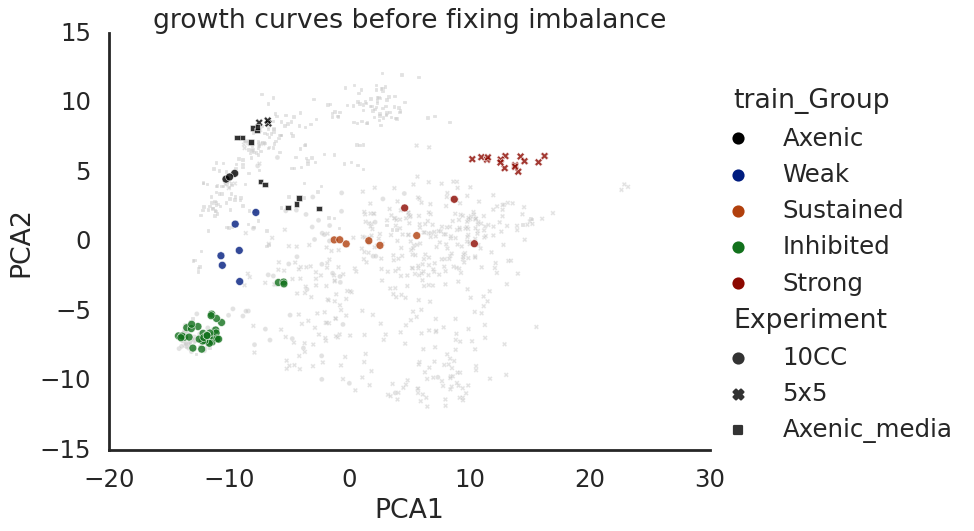

In [52]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[-5:])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    aspect=1.4, alpha=0.8, height=7,
    hue='train_Group', hue_order=tgorder[-5:], palette=tgpalette[-5:],
    s=50,
)
sns.scatterplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[:-5])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    alpha=0.5, 
    zorder=-3,
    
    hue='train_Group', hue_order=tgorder[:-5], palette=tgpalette[:-5],
    s=20, legend=False,
)
plt.title('growth curves before fixing imbalance')

Text(0.5, 1.0, 'growth curves before fixing imbalance')

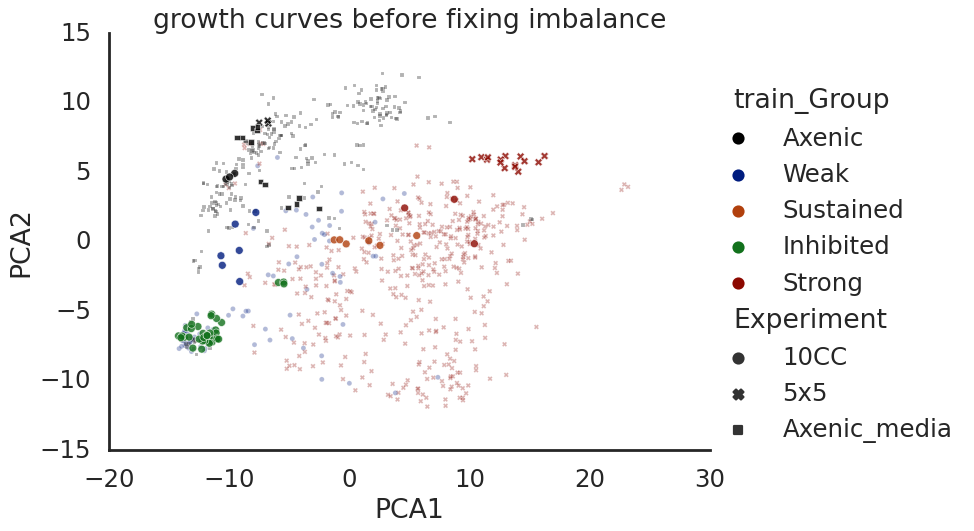

In [53]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[-5:])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    aspect=1.4, alpha=0.8, height=7,
    hue='train_Group', hue_order=tgorder[-5:], palette=tgpalette[-5:],
    s=50,
)
sns.scatterplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[:-5])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    alpha=0.3, 
    zorder=-3,
    
    hue='Experiment', hue_order=eorder, palette=epalette,
    s=20, legend=False,
)
plt.title('growth curves before fixing imbalance')

In [54]:
pcadf.train_Group.value_counts()


Other        808
Inhibited     36
Axenic        18
Strong        18
Sustained      6
Weak           6
Name: train_Group, dtype: int64

# imbalance

In [55]:
from sklearn.model_selection import train_test_split
X_train_before_smt, X_test_before_smt, y_train_before_smt, y_test_before_smt = train_test_split(
    X_logged, y, test_size=0.5, stratify=y, random_state=43
)

X_train_before_smt.shape, y_train_before_smt.shape, X_test_before_smt.shape, y_test_before_smt.shape

((446, 126), (446,), (446, 126), (446,))

In [56]:
np.unique(y_train_before_smt, return_counts=True), np.unique(y_test_before_smt, return_counts=True)

((array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
        dtype=object),
  array([  9,  18, 404,   9,   3,   3])),
 (array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
        dtype=object),
  array([  9,  18, 404,   9,   3,   3])))

In [57]:
tdf  = X_test_before_smt.reset_index()
tdf.loc[~tdf.train_Group.isin(['Other'])].sort_values('train_Group')

train_Group       Sample           id                       full name  \
day                                                                         
5        Axenic          1A0            1                          Axenic   
411      Axenic  Ax_Media_C6    MED4_lowN                Axenic_MED4_lowN   
302      Axenic  Ax_Media_D5    MED4_lowN                Axenic_MED4_lowN   
209      Axenic     5x5_30C0  MED4_Ax_Pro                          Axenic   
166      Axenic  Ax_Media_B5    MED4_lowN                Axenic_MED4_lowN   
129      Axenic     5x5_30A0  MED4_Ax_Pro                          Axenic   
429      Axenic          1B0            1                          Axenic   
58       Axenic     5x5_30B0  MED4_Ax_Pro                          Axenic   
46       Axenic  Ax_Media_D4    MED4_lowN                Axenic_MED4_lowN   
88    Inhibited          4B1            4       Phaeobacter gallaeciensis   
382   Inhibited          4C5            4       Phaeobacter gallaeciensis   
351   Inhibited          3B3            3     Marinobacter adhaerens HP15   
334   Inhibited          3A2            3     Marinobacter adhaerens HP15   
318   Inhibited          3B5            3     Marinobacter adhaerens HP15   
22    Inhibited          4B4            4       Phaeobacter gallaeciensis   
294   Inhibited          3C3            3     Marinobacter adhaerens HP15   
292   Inhibited          4C1            4       Phaeobacter gallaeciensis   
287   Inhibited          3A4            3     Marinobacter adhaerens HP15   
275   Inhibited          3C0            3     Marinobacter adhaerens HP15   
78    Inhibited          4A3            4       Phaeobacter gallaeciensis   
225   Inhibited          3B4            3     Marinobacter adhaerens HP15   
274   Inhibited          3C4            3     Marinobacter adhaerens HP15   
147   Inhibited          3A1            3     Marinobacter adhaerens HP15   
213   Inhibited          4B5            4       Phaeobacter gallaeciensis   
39    Inhibited          3A3            3     Marinobacter adhaerens HP15   
126   Inhibited          4B2            4       Phaeobacter gallaeciensis   
424   Inhibited          3A0            3     Marinobacter adhaerens HP15   
17       Strong          5A0            5  Pseudoalteromonas haloplanktis   
94       Strong      5x5_6C0      MED4_DE           A. mediterranea AltDE   
346      Strong     5x5_11A0     MED4_DE1          A. mediterranea AltDE1   
135      Strong          5C0            5  Pseudoalteromonas haloplanktis   
327      Strong          5B0            5  Pseudoalteromonas haloplanktis   
219      Strong     5x5_21B0    MED4_ATCC          A. macleodii ATCC27126   
151      Strong     5x5_16C0    MED4_BS11               A. macleodii BS11   
171      Strong      5x5_6B0      MED4_DE           A. mediterranea AltDE   
264      Strong     5x5_21C0    MED4_ATCC          A. macleodii ATCC27126   
189   Sustained          7B0            7  Sulfitobacter pseudonitzschiae   
405   Sustained          6C0            6               Ruegeria pomeroyi   
262   Sustained          7A0            7  Sulfitobacter pseudonitzschiae   
301        Weak         11C0           11                 Roseovarius 5C3   
277        Weak         10B0           10                   Marinovum 5F3   
143        Weak         10C0           10                   Marinovum 5F3   

         Group    Experiment ref_Bp[C]                                      \
day                                0.0 1.081944444442343 2.164583333331393   
5       Axenic          10CC  1.277694          0.722813          1.392731   
411     Axenic  Axenic_media  1.125832          0.869392          0.999997   
302     Axenic  Axenic_media  1.681292          1.709262          1.930650   
209     Axenic           5x5  1.195655          1.565913          1.591697   
166     Axenic  Axenic_media  1.358651          1.485497          1.715871   
129     Axenic           5x5  1.358651          1.508308          1.5

In [58]:
 #sampling_strategy = {'Axenic' :100, 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],

In [59]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler, SMOTE

#over_sampler =  RandomOverSampler()
smoteenn = SMOTEENN(smote=SMOTE(k_neighbors=2))
X_smt, y_smt = smoteenn.fit_resample(X_train_before_smt, y_train_before_smt)

In [60]:
y_train_before_smt.value_counts()

Other        404
Inhibited     18
Strong         9
Axenic         9
Sustained      3
Weak           3
Name: train_Group, dtype: int64

In [61]:
np.unique(y_smt, return_counts=True)

(array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
       dtype=object),
 array([404, 404, 355, 404, 404, 404]))

In [62]:
from sklearn.decomposition import PCA
pca = Pipeline([
    ('scale', StandardScaler()),    
    ('clf', PCA(n_components=2))
],
    memory='/tmp/Osnat/sklearn_cache',
)


In [63]:
X_smt

ref_Bp[C]                                                              \
day  0.000000  1.081944  2.164583  2.747222  3.754167  4.701389  5.720139    
0     0.337462  0.814583  0.814583  0.984809  1.063092  0.926559  0.797162   
1     0.907337  1.057335  0.763661  0.851865  0.859053  0.894566  1.019533   
2     0.834787  0.441125  0.745501  0.544442  0.653475  0.901630  1.005939   
3     1.449013  0.997514  1.381666  1.537687  1.750043  1.995473  2.221934   
4     1.191334  0.848705  0.929449  0.833703  1.114670  1.285221  1.372449   
...        ...       ...       ...       ...       ...       ...       ...   
2370  1.020428  1.076411  1.290105  1.471367  1.559960  1.661166  1.600394   
2371  0.983433  1.138757  1.280937  1.473967  1.634293  1.661713  1.532996   
2372  1.109408  1.017428  1.344747  1.507255  1.490403  1.758974  1.887394   
2373  1.064614  1.174020  1.362705  1.547974  1.677789  1.848017  1.917149   
2374  1.045683  1.165797  1.343637  1.530715  1.667646  1.804571  1.827565   

                                    ... ref_Bp[N]                      \
day  6.731944  7.984028  8.943750   ... 73.768750 76.939583 79.795139   
0     1.102807  1.369014  1.580883  ...  0.000000  0.000000  0.003617   
1     1.111880  1.361943  1.376792  ...  0.329100  0.381989  0.399379   
2     0.917973  1.114726  1.270124  ...  0.000000  0.069480  0.126023   
3     2.424245  2.675206  2.529591  ...  0.000000  0.086151  0.000000   
4     1.434742  1.674567  1.888456  ...  0.230073  0.054058  0.010769   
...        ...       ...       ...  ...       ...       ...       ...   
2370  1.544312  0.875231  1.352097  ...  0.000000  0.001139  0.042072   
2371  1.415095  0.642273  1.281271  ...  0.000000  0.002954  0.005428   
2372  2.001322  1.613708  1.625663  ...  0.000000  0.017608  0.122110   
2373  1.975243  1.490516  1.631941  ...  0.000000  0.038381  0.070521   
2374  1.844618  1.292707  1.550165  ...  0.000000  0.030119  0.055342   

                                                                            
day  80.888889 81.958333 84.218750 86.892361 87.794444 88.748611 91.000000  
0     0.003975  0.012265  0.029281  0.000000  0.000000  0.000000  0.000000  
1     0.367749  0.307641  0.144126  0.000000  0.000000  0.000000  0.003617  
2     0.125074  0.102325  0.049923  0.000000  0.000000  0.000000  0.000000  
3     0.003617  0.000000  0.000000  0.000000  0.094424  0.003617  0.000000  
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
...        ...       ...       ...       ...       ...       ...       ...  
2370  0.053383  0.000000  0.080833  0.000000  0.000000  0.061804  0.004284  
2371  0.000000  0.013420  0.000000  0.002954  0.016323  0.015706  0.000000  
2372  0.119850  0.068377  0.181477  0.015050  0.083164  0.218778  0.009617  
2373  0.000000  0.174370  0.000000  0.038381  0.212079  0.204070  0.000000  
2374  0.000000  0.136836  0.000000  0.030119  0.166429  0.160144  0.000000  

[2375 rows x 126 columns]

In [64]:
Xpca = pca.fit_transform(X_smt)
pcadf = pd.DataFrame(Xpca, columns=['PCA1', 'PCA2'])
pcadf['train_Group'] = y_smt


Text(0.5, 1.0, 'growth curves after fixing imbalance')

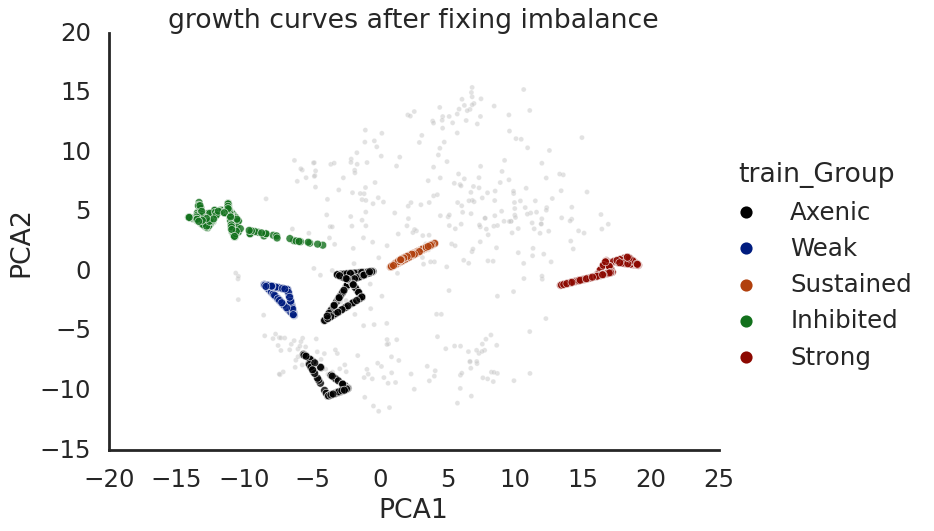

In [65]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[-5:])]
    , x='PCA1', y='PCA2',  
    aspect=1.4, alpha=0.8, height=7,
    hue='train_Group', hue_order=tgorder[-5:], palette=tgpalette[-5:],
    s=50,
)
sns.scatterplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[:-5])]
    , x='PCA1', y='PCA2',  
    alpha=0.5, 
    zorder=-3,
    
    hue='train_Group', hue_order=tgorder[:-5], palette=tgpalette[:-5],
    s=20, legend=False,
)
plt.title('growth curves after fixing imbalance')

# Compute features

In [66]:
def _compute_max_features(df, groupby_col, nutrient, biomass_prefix):
    refmaxbp_df = df.loc[df.groupby(groupby_col)[f'{biomass_prefix}[{nutrient}]'].idxmax()].reset_index(drop=True)
    refmaxbp_df = refmaxbp_df.set_index(groupby_col)
    refmaxbp_df = refmaxbp_df[['day', f'{biomass_prefix}[{nutrient}]']]
    refmaxbp_df.rename(columns={
        'day' : f'max_{nutrient}day', 
        f'{biomass_prefix}[{nutrient}]' : f'max_{nutrient}biomass',
    }, inplace=True)
    return refmaxbp_df

def _compute_mean_features(df, groupby_col, nutrient, biomass_prefix):
    min_day = 30
    max_day = 60
    lterm_df = df.loc[df.day.ge(min_day) & df.day.le(max_day)]
    reflterm_df = lterm_df.groupby(groupby_col)[f'{biomass_prefix}[{nutrient}]'].agg(['mean', 'std', 'median'])
    reflterm_df.rename(columns={
        'mean' : f'mean_{nutrient}biomass',
        'median' : f'median_{nutrient}biomass',
        'std' : f'std_{nutrient}biomass',
    }, inplace=True)
    return reflterm_df

def _compute_lastday_features(df, groupby_col, nutrient, biomass_prefix):
    lod_lastday_threshold = np.log10(2)
    refmaxday_df = df.loc[df[f'{biomass_prefix}[{nutrient}]'].ge(lod_lastday_threshold)].groupby(groupby_col).day.max()
    #refmaxday_df.rename(columns=dict(day=f'last_day{nutrient}'), inplace=True)
    refmaxday_df.name = f'last_day{nutrient}'
    return refmaxday_df

def _compute_features(df, groupby_col, biomass_prefix):
    #return (
    
    df_list = (
        [_compute_max_features(df, groupby_col, nutrient, biomass_prefix) for nutrient in 'NC'] +
        [_compute_mean_features(df, groupby_col, nutrient, biomass_prefix) for nutrient in 'NC'] +
        [_compute_lastday_features(df, groupby_col, nutrient, biomass_prefix) for nutrient in 'NC']
    )
    df_merge = df_list[0].join(df_list[1:])
        
    df_merge.fillna(0, inplace=True) # for last day
    return df_merge
    

In [67]:
# log the biomass
def add_log_cols(df, biomass_prefix):
    lod_threshold = 1
    for nutrient in 'NC':
        df[f'log_{nutrient}biomass'] = np.log10(df[f'{biomass_prefix}[{nutrient}]'].clip(lower=lod_threshold))
    return df

In [68]:
def _X_smt_to_features(X_smt):
    x = X_smt.T.melt(ignore_index=False, var_name='smt_id',).reset_index()
    x = x.pivot(index=['smt_id', 'day'], values='value', columns='level_0').reset_index()
    return _compute_features(x, groupby_col='smt_id', biomass_prefix='ref_Bp')

X_smt_features = _X_smt_to_features(X_smt)

In [69]:
#x_groupby_col = ['shuffle_id', 'id', 'full name', ]# 'Group']
#x_log_col = [f'log_{nutrient}biomass' for nutrient in 'NC']
X_smt_logged = X_smt.copy()
#X_smt_logged = np.log10(X_smt.clip(lower=1))
X_smt_logged.columns = [f'{col}_{day:2.1f}' for col,day in X_smt_logged.columns.values]

logistic_Nfeatures = [c for c in X_smt_logged.columns if c.startswith('ref_Bp[N]')]
logistic_Cfeatures = [c for c in X_smt_logged.columns if c.startswith('ref_Bp[C]')]
forest_features = X_smt_features.columns
X_train = X_smt_features.join(X_smt_logged)


In [70]:
X_test_features = _X_smt_to_features(X_test_before_smt.reset_index(drop=True))
X_test_features.index = X_test_before_smt.index


In [71]:
#x_groupby_col = ['shuffle_id', 'id', 'full name', ]# 'Group']
#x_log_col = [f'log_{nutrient}biomass' for nutrient in 'NC']
#X_test_logged = np.log10(X_test_before_smt.clip(lower=1))
X_test_logged = X_test_before_smt

X_test_logged.columns = [f'{col}_{day:2.1f}' for col,day in X_test_logged.columns.values]
X_test = X_test_features.join(X_test_logged)


In [72]:
y_smt

array(['Axenic', 'Axenic', 'Axenic', ..., 'Weak', 'Weak', 'Weak'],
      dtype=object)

In [73]:
pd.Series(y_smt).value_counts()

Axenic       404
Inhibited    404
Strong       404
Sustained    404
Weak         404
Other        355
dtype: int64

In [74]:
y_test = y_test_before_smt
y_train = y_smt

In [75]:
logistic_Cfeatures, logistic_Nfeatures, forest_features

(['ref_Bp[C]_0.0',
  'ref_Bp[C]_1.1',
  'ref_Bp[C]_2.2',
  'ref_Bp[C]_2.7',
  'ref_Bp[C]_3.8',
  'ref_Bp[C]_4.7',
  'ref_Bp[C]_5.7',
  'ref_Bp[C]_6.7',
  'ref_Bp[C]_8.0',
  'ref_Bp[C]_8.9',
  'ref_Bp[C]_9.7',
  'ref_Bp[C]_10.8',
  'ref_Bp[C]_11.7',
  'ref_Bp[C]_12.8',
  'ref_Bp[C]_13.7',
  'ref_Bp[C]_16.1',
  'ref_Bp[C]_16.7',
  'ref_Bp[C]_17.7',
  'ref_Bp[C]_18.7',
  'ref_Bp[C]_19.7',
  'ref_Bp[C]_20.8',
  'ref_Bp[C]_21.9',
  'ref_Bp[C]_23.9',
  'ref_Bp[C]_25.7',
  'ref_Bp[C]_26.7',
  'ref_Bp[C]_27.9',
  'ref_Bp[C]_29.8',
  'ref_Bp[C]_31.1',
  'ref_Bp[C]_31.8',
  'ref_Bp[C]_32.8',
  'ref_Bp[C]_33.7',
  'ref_Bp[C]_34.8',
  'ref_Bp[C]_36.9',
  'ref_Bp[C]_37.8',
  'ref_Bp[C]_39.9',
  'ref_Bp[C]_40.8',
  'ref_Bp[C]_41.8',
  'ref_Bp[C]_44.8',
  'ref_Bp[C]_46.8',
  'ref_Bp[C]_47.9',
  'ref_Bp[C]_48.8',
  'ref_Bp[C]_49.9',
  'ref_Bp[C]_51.8',
  'ref_Bp[C]_53.0',
  'ref_Bp[C]_54.8',
  'ref_Bp[C]_58.8',
  'ref_Bp[C]_59.9',
  'ref_Bp[C]_62.9',
  'ref_Bp[C]_65.7',
  'ref_Bp[C]_67.0',
  'ref_Bp[C

# Stacking classifier

The goal is to create multiple classifiers:
1. randomforest based on generated features: last day, max day, max value, mean late biomass (N & C), std late biomass (N & C)
2. logical regression based on N biomass
3. logical regression based on C biomass
4. tslearn based on N biomass 
5. tslearn based on C biomass 

and than combine the results using a stacking classifier

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingClassifier
# Classifiers
clf_features = RandomForestClassifier()
clf_logisticN = LogisticRegression(penalty='l2', C=0.1, max_iter=10000)
clf_logisticC = LogisticRegression(penalty='l2', C=0.1, max_iter=10000)
clf_meta = LogisticRegression()

pipe_logisticN = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', logistic_Nfeatures)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_logisticN)
],
    memory='/tmp/Osnat/sklearn_cache',
)
pipe_logisticC = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', logistic_Cfeatures)], remainder='drop')),
    ('scale', StandardScaler()),    
    ('clf', clf_logisticC)
],
    memory='/tmp/Osnat/sklearn_cache',
)
pipe_forest = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', forest_features)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_features)
],
    memory='/tmp/Osnat/sklearn_cache',
)



stack = StackingClassifier(
    estimators=[
        ('logisticN', pipe_logisticN),
        ('logisticC', pipe_logisticC),
        ('ForestFeatures', pipe_forest),
    ],
    final_estimator=clf_meta,
    n_jobs = -1, verbose=True
)

#stack.fit(X_train, y_train)


# FOREST

In [77]:
class_weight = {i : 1 if i == 'Other' else 1000 for i in y.unique()}
class_weight

{'Axenic': 1000,
 'Inhibited': 1000,
 'Other': 1,
 'Strong': 1000,
 'Sustained': 1000,
 'Weak': 1000}

In [78]:
clf_features = RandomForestClassifier(class_weight=class_weight, # min_samples_leaf=25
                                     )
pipe_forest = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', forest_features)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_features)
],
    memory='/tmp/Osnat/sklearn_cache',
)


In [79]:
pipe_forest.fit(X_train,y_train)

Pipeline(memory='/tmp/Osnat/sklearn_cache',
         steps=[('select',
                 ColumnTransformer(transformers=[('sel', 'passthrough',
                                                  Index(['max_Nday', 'max_Nbiomass', 'max_Cday', 'max_Cbiomass', 'mean_Nbiomass',
       'std_Nbiomass', 'median_Nbiomass', 'mean_Cbiomass', 'std_Cbiomass',
       'median_Cbiomass', 'last_dayN', 'last_dayC'],
      dtype='object'))])),
                ('scale', StandardScaler()),
                ('clf',
                 RandomForestClassifier(class_weight={'Axenic': 1000,
                                                      'Inhibited': 1000,
                                                      'Other': 1,
                                                      'Strong': 1000,
                                                      'Sustained': 1000,
                                                      'Weak': 1000}))])

<Axes: xlabel='Importance', ylabel='Feature'>

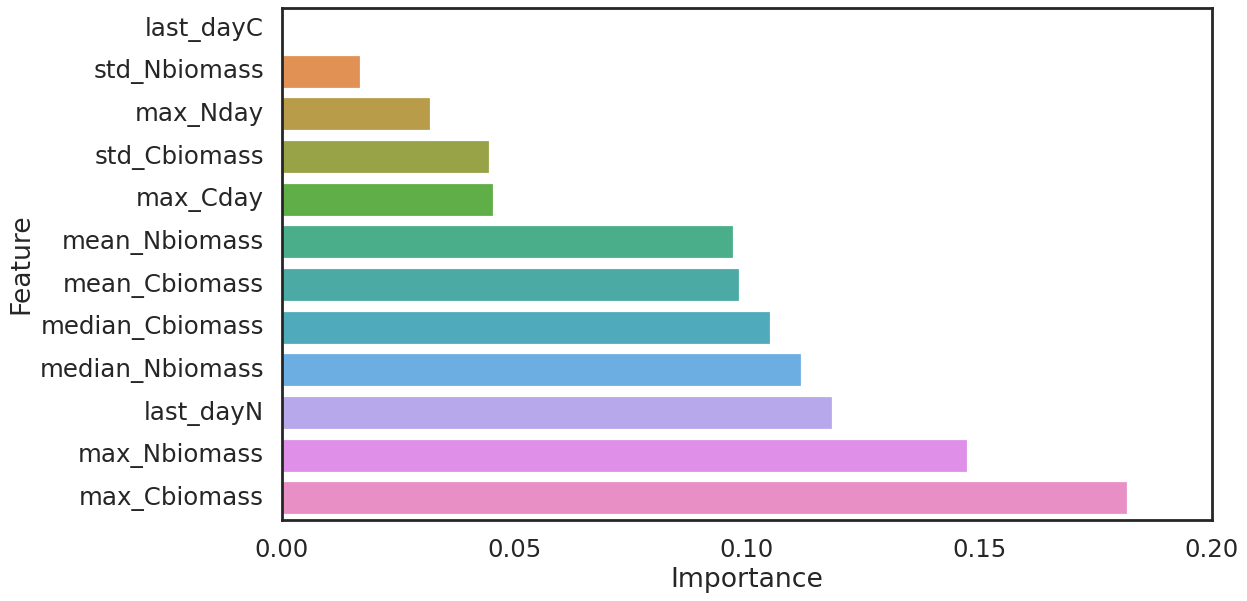

In [80]:
forest_importance_df = pd.DataFrame(dict(Feature=forest_features, Importance=pipe_forest.named_steps.clf.feature_importances_))
forest_importance_df =forest_importance_df.sort_values('Importance')
                                    
sns.barplot(data=forest_importance_df, y='Feature', x='Importance')


In [81]:
y_pred_prop = pipe_forest.predict_proba(X_test)
y_pred = pipe_forest.predict(X_test)

In [82]:
tdf  = X_test_before_smt.reset_index()
tdf.loc[~tdf.train_Group.isin(['Other'])].sort_values('train_Group')[['train_Group', 'id', 'full name']]

,train_Group,id,full name
5,Axenic,1,Axenic
411,Axenic,MED4_lowN,Axenic_MED4_lowN
302,Axenic,MED4_lowN,Axenic_MED4_lowN
209,Axenic,MED4_Ax_Pro,Axenic
166,Axenic,MED4_lowN,Axenic_MED4_lowN
129,Axenic,MED4_Ax_Pro,Axenic
429,Axenic,1,Axenic
58,Axenic,MED4_Ax_Pro,Axenic
46,Axenic,MED4_lowN,Axenic_MED4_lowN
88,Inhibited,4,Phaeobacter gallaeciensis


In [83]:
from sklearn.metrics import balanced_accuracy_score
print(pipe_forest.score(X_train, y_train), pipe_forest.score(X_test, y_test))
print(balanced_accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

1.0 0.8497757847533632
0.625045837917125
              precision    recall  f1-score   support

      Axenic       0.18      0.44      0.26         9
   Inhibited       0.33      1.00      0.49        18
       Other       0.97      0.86      0.91       404
      Strong       1.00      0.78      0.88         9
   Sustained       1.00      0.67      0.80         3
        Weak       0.00      0.00      0.00         3

    accuracy                           0.85       446
   macro avg       0.58      0.63      0.56       446
weighted avg       0.92      0.85      0.87       446



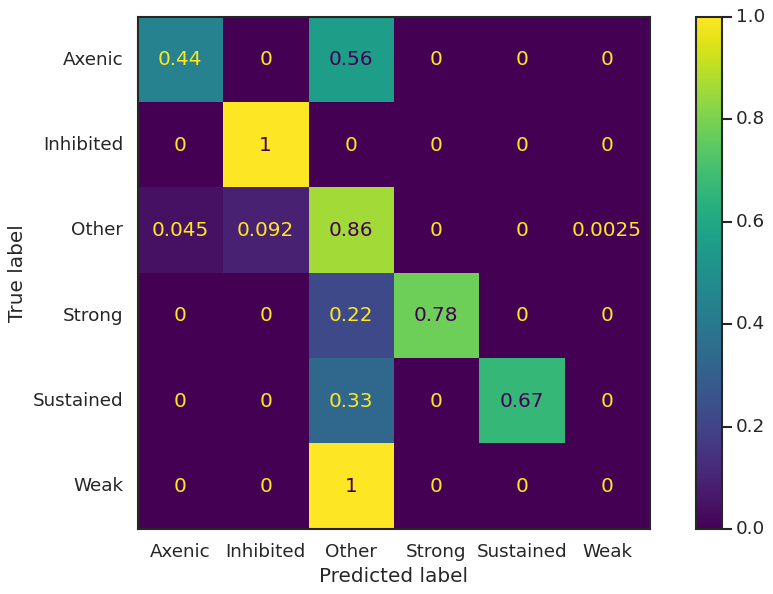

In [84]:
sns.set_context('talk')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, y_pred=y_pred, normalize='true')
#plt.xlim((0,30))

# stack

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(y_train), le.classes_


(array([0, 0, 0, ..., 5, 5, 5]),
 array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
       dtype=object))

In [86]:
class_weight_map = {'Axenic' : 100, 'Inhibited' : 100, 'Other': 1, 'Strong' : 10000, 'Sustained' : 10000, 'Weak': 100}

In [87]:
class_weight = {i : class_weight_map[c] for i,c in enumerate(le.classes_)}
class_weight

{0: 100, 1: 100, 2: 1, 3: 10000, 4: 10000, 5: 100}

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingClassifier
# Classifiers
clf_features = RandomForestClassifier(ccp_alpha=0.05, class_weight=class_weight)
clf_logisticN = LogisticRegression(penalty='l2', C=0.1, max_iter=10000, class_weight=class_weight,)
clf_logisticC = LogisticRegression(penalty='l2', C=0.1, max_iter=10000, class_weight=class_weight,)
clf_meta = LogisticRegression()

pipe_logisticN = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', logistic_Nfeatures)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_logisticN)
],
    memory='/tmp/Osnat/sklearn_cache',
)
pipe_logisticC = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', logistic_Cfeatures)], remainder='drop')),
    ('scale', StandardScaler()),    
    ('clf', clf_logisticC)
],
    memory='/tmp/Osnat/sklearn_cache',
)
pipe_forest = Pipeline([
    ('select', ColumnTransformer([('sel', 'passthrough', forest_features)], remainder='drop')),  
    ('scale', StandardScaler()),    
    ('clf', clf_features)
],
    memory='/tmp/Osnat/sklearn_cache',
)



stack = StackingClassifier(
    estimators=[
        ('logisticN', pipe_logisticN),
        ('logisticC', pipe_logisticC),
        ('ForestFeatures', pipe_forest),
    ],
    final_estimator=clf_meta,
    n_jobs = -1, verbose=True
)



In [89]:
stack.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:370: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:370: UserWarning: Persisting input arguments took 0.55s to run.
If this happens often in your code, it can cause performance pr

StackingClassifier(estimators=[('logisticN',
                                Pipeline(memory='/tmp/Osnat/sklearn_cache',
                                         steps=[('select',
                                                 ColumnTransformer(transformers=[('sel',
                                                                                  'passthrough',
                                                                                  ['ref_Bp[N]_0.0',
                                                                                   'ref_Bp[N]_1.1',
                                                                                   'ref_Bp[N]_2.2',
                                                                                   'ref_Bp[N]_2.7',
                                                                                   'ref_Bp[N]_3.8',
                                                                                   'ref_Bp[N]_4.7',
                                                                                   'ref_Bp[N]_5.7',
                                                                                   'ref_Bp[N]_6.7',
                                                                                   'ref_Bp[N]_8.0',
                                                                                   'ref_Bp[N]_8.9',
                                                                                   'ref_Bp[N]_9.7',
                                                                                   'ref_Bp[N]_10.8'...
                                                                                  Index(['max_Nday', 'max_Nbiomass', 'max_Cday', 'max_Cbiomass', 'mean_Nbiomass',
       'std_Nbiomass', 'median_Nbiomass', 'mean_Cbiomass', 'std_Cbiomass',
       'median_Cbiomass', 'last_dayN', 'last_dayC'],
      dtype='object'))])),
                                                ('scale', StandardScaler()),
                                                ('clf',
                                                 RandomForestClassifier(ccp_alpha=0.05,
                                                                        class_weight={0: 100,
                                                                                      1: 100,
                                                                                      2: 1,
                                                                                      3: 10000,
                                                                                      4: 10000,
                                                                                      5: 100}))]))],
                   final_estimator=LogisticRegression(), n_jobs=-1,
                   verbose=True)

In [90]:
y_pred_prop = stack.predict_proba(X_test)
y_pred = stack.predict(X_test)

In [91]:
y_pred_prop

array([[1.50990166e-06, 1.10557915e-05, 9.99958068e-01, 3.12999633e-06,
        9.50319572e-06, 1.67332262e-05],
       [2.04913867e-06, 1.29885644e-05, 9.99946834e-01, 9.19769014e-07,
        1.83667645e-05, 1.88416570e-05],
       [1.59961886e-06, 1.13559996e-05, 9.99956849e-01, 3.22292083e-06,
        9.80066695e-06, 1.71721126e-05],
       ...,
       [2.48428309e-06, 1.38006448e-05, 9.99946646e-01, 2.57429012e-06,
        1.40001692e-05, 2.04941476e-05],
       [3.70677644e-06, 1.60250684e-05, 9.99937509e-01, 4.76465062e-06,
        1.39908485e-05, 2.40037632e-05],
       [5.50665972e-06, 3.10206472e-05, 9.99869298e-01, 1.77211423e-05,
        3.15639357e-05, 4.48898900e-05]])

In [92]:
from sklearn.metrics import balanced_accuracy_score
#print(pipe_forest.score(X_train, y_train), pipe_forest.score(X_test, y_test))
print(balanced_accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8420883755042171
              precision    recall  f1-score   support

      Axenic       0.17      0.78      0.29         9
   Inhibited       0.28      0.94      0.44        18
       Other       0.99      0.77      0.87       404
      Strong       0.36      0.89      0.52         9
   Sustained       0.60      1.00      0.75         3
        Weak       0.67      0.67      0.67         3

    accuracy                           0.78       446
   macro avg       0.51      0.84      0.59       446
weighted avg       0.93      0.78      0.83       446



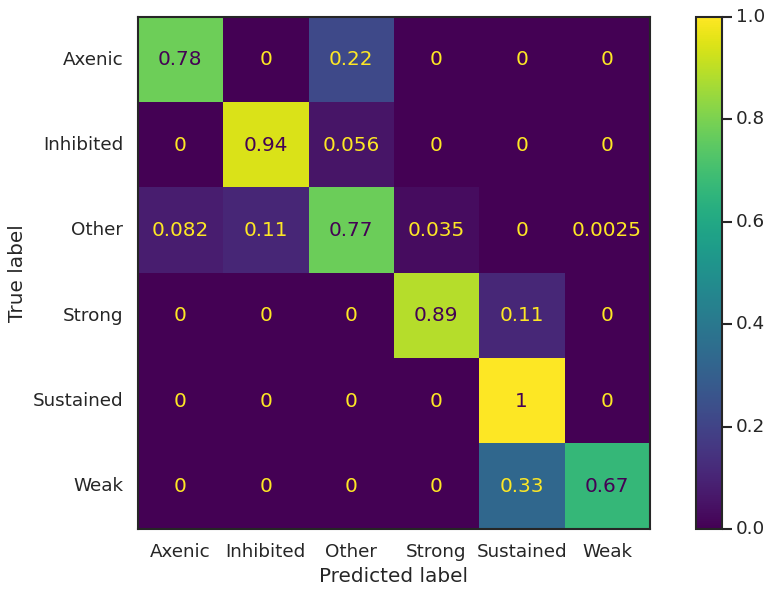

In [93]:
sns.set_context('talk')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, y_pred=y_pred, normalize='true')
#plt.xlim((0,30))

In [94]:
X_test

max_Nday  \
train_Group Sample       id             full name                      Group        Experiment                
Other       6A4          6              Ruegeria pomeroyi              Sustained    10CC          20.778472   
            5x5_37B7     all_all        Axenic                         Other        5x5           13.695833   
            5x5_15C3     MIT0604_DE1    A. mediterranea AltDE1         Strong_Other 5x5           17.727083   
            5x5_18C2     MIT9312_BS11   A. macleodii BS11              Strong_Other 5x5           12.830556   
            Ax_Media_A19 9312_lowP(1:8) Axenic_9312_lowP(1:8)          Axenic_Other Axenic_media  11.718056   
...                                                                                                     ...   
            Ax_Media_B67 PAC1_lowP(1:8) Axenic_PAC1_lowP(1:8)          Axenic_Other Axenic_media  12.830556   
            Ax_Media_C20 9312_lowP(1:8) Axenic_9312_lowP(1:8)          Axenic_Other Axenic_media   7.984028   
            5x5_15C2     MIT0604_DE1    A. mediterranea AltDE1         Strong_Other 5x5           16.140972   
            7B2          7              Sulfitobacter pseudonitzschiae Sustained    10CC          16.727083   
            Ax_Media_C9  MED4_lowP(1:8) Axenic_MED4_lowP(1:8)          Axenic_Other Axenic_media  11.718056   

                                                                                                  max_Nbiomass  \
train_Group Sample       id             full name                      Group        Experiment                   
Other       6A4          6              Ruegeria pomeroyi              Sustained    10CC              1.708492   
            5x5_37B7     all_all        Axenic                         Other        5x5               1.783718   
            5x5_15C3     MIT0604_DE1    A. mediterranea AltDE1         Strong_Other 5x5               1.704534   
            5x5_18C2     MIT9312_BS11   A. macleodii BS11              Strong_Other 5x5               1.950829   
            Ax_Media_A19 9312_lowP(1:8) Axenic_9312_lowP(1:8)          Axenic_Other Axenic_media      1.993662   
...                                                                                                        ...   
            Ax_Media_B67 PAC1_lowP(1:8) Axenic_PAC1_lowP(1:8)          Axenic_Other Axenic_media      2.098760   
            Ax_Media_C20 9312_lowP(1:8) Axenic_9312_lowP(1:8)          Axenic_Other Axenic_media      1.949265   
            5x5_15C2     MIT0604_DE1    A. mediterranea AltDE1         Strong_Other 5x5               1.955025   
            7B2          7              Sulfitobacter pseudonitzschiae Sustained    10CC              1.792886   
            Ax_Media_C9  MED4_lowP(1:8) Axenic_MED4_lowP(1:8)          Axenic_Other Axenic_media      2.212450   

                                                                                                   max_Cday  \
train_Group Sample       id             full name                      Group        Experiment                
Other       6A4          6              Ruegeria pomeroyi              Sustained    10CC          20.778472   
            5x5_37B7     all_all        Axenic                         Other        5x5           13.695833   
            5x5_15C3     MIT0604_DE1    A. mediterranea AltDE1         Strong_Other 5x5           17.727083   
            5x5_18C2     MIT9312_BS11   A. macleodii BS11              Strong_Other 5x5           12.830556   
            Ax_Media_A19 9312_lowP(1:8) Axenic_9312_lowP(1:8)          Axenic_Other Axenic_media  11.718056   
...                                                                                                     ...   
            Ax_Media_B67 PAC1_lowP(1:8) Axenic_PAC1_lowP(1:8)          Axenic_Other Axenic_media  12.830556   
            Ax_Media_C20 9312_lowP(1:8) Axenic_9312_lowP(1:8)          Axenic_Other Axenic_media   7.984028   
            5x5_15C2     MIT0604_DE1    A. mediterranea AltDE1

In [95]:
df_predicted = pd.DataFrame(y_pred_prop, columns=stack.classes_)
df_predicted['y'] = y_test
df_predicted['y_pred'] = y_pred

df_predicted.index = X_test.index
df_predicted = df_predicted.reset_index()
df_predicted


,train_Group,Sample,id,full name,Group,Experiment,Axenic,Inhibited,Other,Strong,Sustained,Weak,y,y_pred
0,Other,6A4,6,Ruegeria pomeroyi,Sustained,10CC,0.000002,0.000011,0.999958,3.129996e-06,0.000010,0.000017,Other,Other
1,Other,5x5_37B7,all_all,Axenic,Other,5x5,0.000002,0.000013,0.999947,9.197690e-07,0.000018,0.000019,Other,Other
2,Other,5x5_15C3,MIT0604_DE1,A. mediterranea AltDE1,Strong_Other,5x5,0.000002,0.000011,0.999957,3.222921e-06,0.000010,0.000017,Other,Other
3,Other,5x5_18C2,MIT9312_BS11,A. macleodii BS11,Strong_Other,5x5,0.001126,0.002727,0.145204,8.471367e-01,0.000768,0.003038,Other,Strong
4,Other,Ax_Media_A19,9312_lowP(1:8),Axenic_9312_lowP(1:8),Axenic_Other,Axenic_media,0.005328,0.000633,0.992534,2.206794e-04,0.000566,0.000718,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,Other,Ax_Media_B67,PAC1_lowP(1:8),Axenic_PAC1_lowP(1:8),Axenic_Other,Axenic_media,0.000003,0.000016,0.999940,4.765270e-06,0.000014,0.000023,Other,Other
442,Other,Ax_Media_C20,9312_lowP(1:8),Axenic_9312_lowP(1:8),Axenic_Other,Axenic_media,0.107423,0.002427,0.883397,6.366643e-04,0.003012,0.003103,Other,Other
443,Other,5x5_15C2,MIT0604_DE1,A. mediterranea AltDE1,Strong_Other,5x5,0.000002,0.000014,0.999947,2.574290e-06,0.000014,0.000020,Other,Other
444,Other,7B2,7,Sulfitobacter pseudonitzschiae,Sustained,10CC,0.000004,0.000016,0.999938,4.764651e-06,0.000014,0.000024,Other,Other


In [96]:
df_predicted.columns

Index(['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',
       'Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak', 'y',
       'y_pred'],
      dtype='object')

In [97]:
mdf_predicted = df_predicted.melt(
    id_vars=['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',
        'y', 'y_pred'], 
    var_name='predicted', value_name='prob')
#mdf_predicted.predicted = pd.to_numeric(mdf_predicted.predicted)
mdf_predicted['predicted_correctly'] = (mdf_predicted['y'] == mdf_predicted['predicted']).map({
    True: 'correct prediction', False: 'false prediction'
})



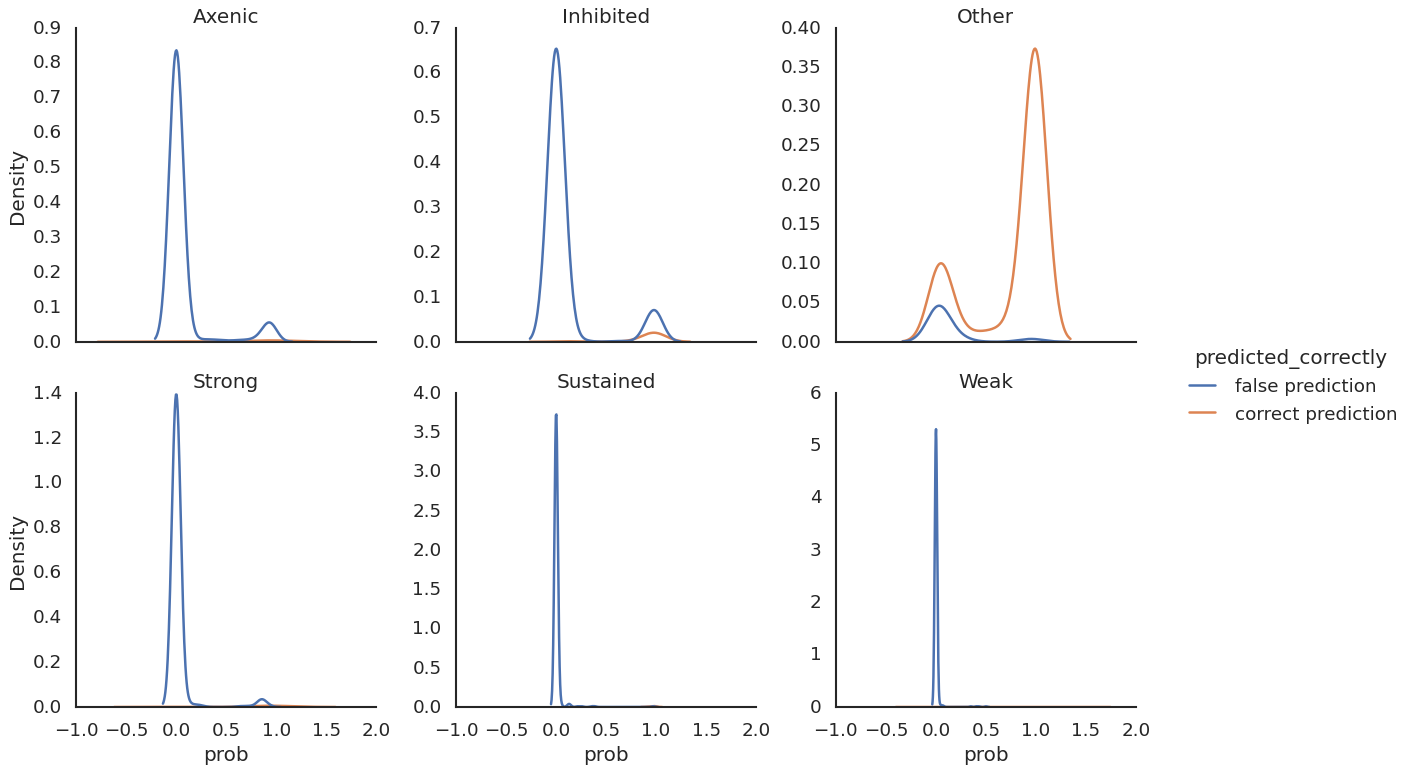

In [98]:
g=sns.displot(data=mdf_predicted, #.loc[mdf_predicted.predicted.isin([3])], 
            x='prob',
            kind='kde',
            col='predicted',
            hue='predicted_correctly',
            col_wrap=3,
              #stat='percent',
              #log_scale=True,
          #clip=(0,1),
              facet_kws=dict(sharey=False),
           )
g.set_titles(col_template='{col_name}')
#g.set(yscale='log')

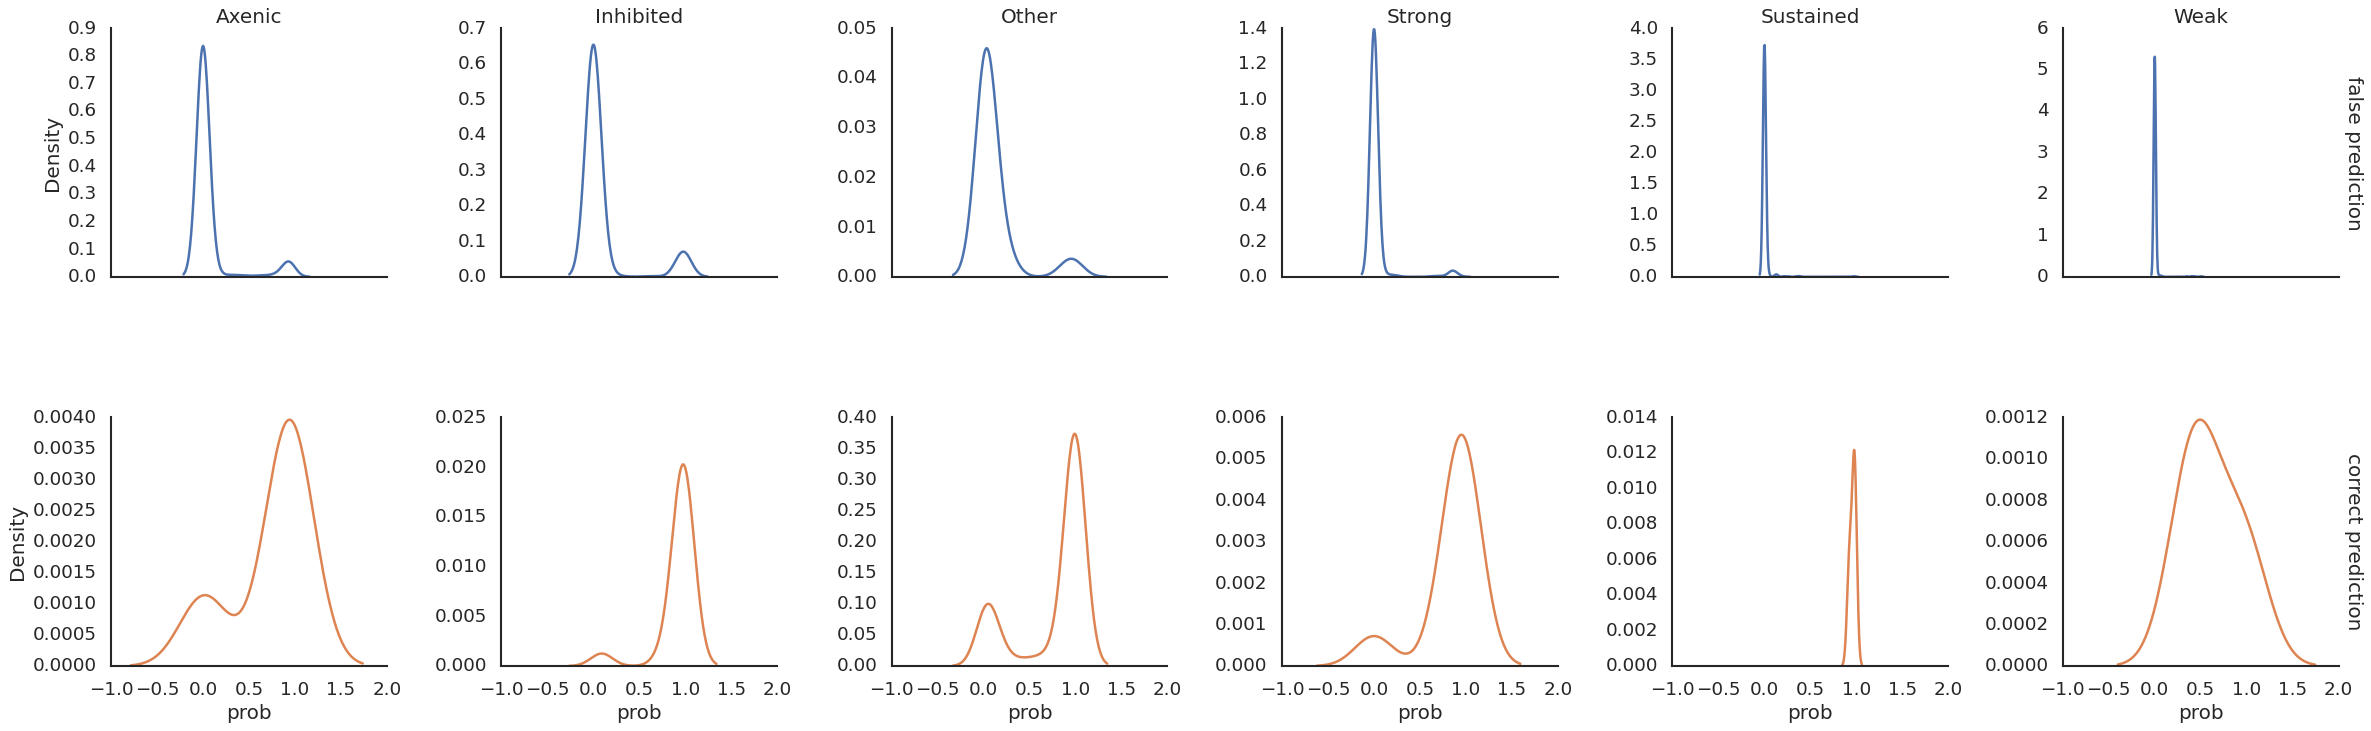

In [99]:
g=sns.displot(data=mdf_predicted, #.loc[mdf_predicted.predicted_correctly.isin([True])], 
            x='prob',
            kind='kde',
            col='predicted',
            row='predicted_correctly',
            hue='predicted_correctly',
            #col_wrap=3,
              #stat='percent',
              #log_scale=True,
          #clip=(0,1),
              legend=False,
              facet_kws=dict(sharey=False, margin_titles=True),
           )
g.set_titles(col_template='{col_name}', row_template='{row_name}', )
#g.set(yscale='log')

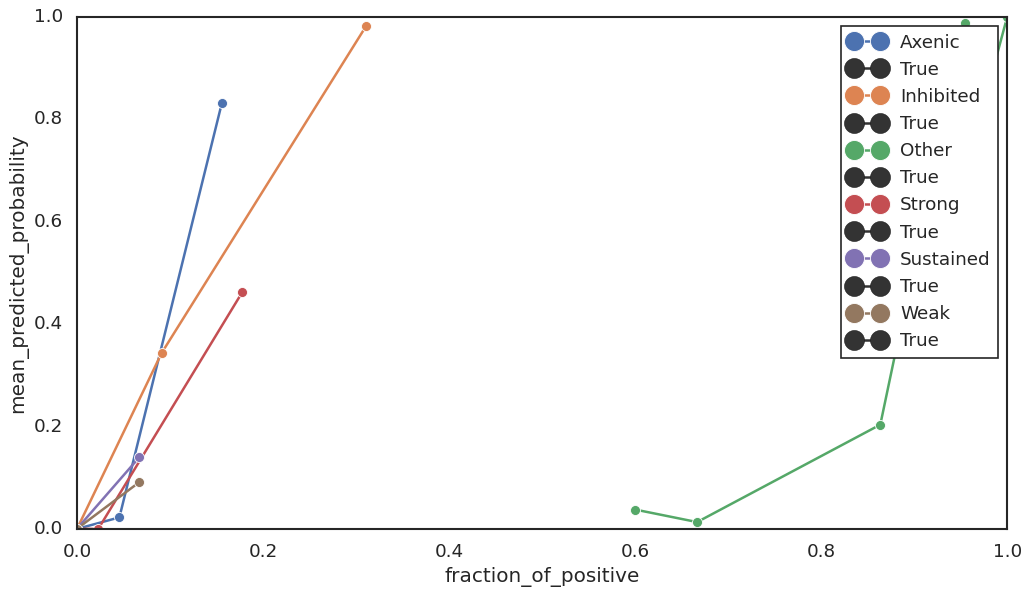

In [100]:
from sklearn.calibration import calibration_curve
for class_ in stack.classes_:
    sns.lineplot(
    #sns.scatterplot(
        data=pd.DataFrame(calibration_curve(
            y_test==class_, df_predicted[class_], 
            strategy='quantile', 
            n_bins=10,)).T,
        x=0, y=1, markers=True, style=True,
        label=class_
    )
plt.gca().set(xlabel='fraction_of_positive', ylabel='mean_predicted_probability')
plt.show()

# classify simulations

In [101]:
dpath = '../results'
sim_df = pd.read_csv(os.path.join(dpath,'monte4_df.csv.gz',))


In [102]:
sim_df = sim_df[['run_id', 'day', 'Bptotal[N]','Bptotal[C]']]

In [103]:
min_values = sim_df.groupby('run_id').min().min(axis=1)
bad_ids_negative_values = set(min_values[min_values< 0].index)
len(bad_ids_negative_values)

1019

In [104]:
max_values = sim_df.groupby('run_id').max().max(axis=1)
bad_ids_toobig_values = set(max_values[max_values>1e5].index)
len(bad_ids_toobig_values)

4

In [105]:
sim_df = sim_df.loc[~sim_df.run_id.isin(bad_ids_negative_values | bad_ids_toobig_values)].copy()

In [106]:
sim_df.rename(columns={'Bptotal[N]':'ref_Bp[N]','Bptotal[C]':'ref_Bp[C]'}, inplace=True)

In [107]:
sim_df

,run_id,day,ref_Bp[N],ref_Bp[C]
0,monte4_ROS_38_monte_vpro_4876_ROS_59_lowN_all_...,0.000000,0.892857,5.915179
1,monte4_ROS_38_monte_vpro_4876_ROS_59_lowN_all_...,1.081944,2.479189,11.850470
2,monte4_ROS_38_monte_vpro_4876_ROS_59_lowN_all_...,2.164583,4.956136,23.678559
3,monte4_ROS_38_monte_vpro_4876_ROS_59_lowN_all_...,2.747222,7.191525,34.358417
4,monte4_ROS_38_monte_vpro_4876_ROS_59_lowN_all_...,3.754167,13.683119,65.373152
...,...,...,...,...
3232763,monte4_EXOENZYME_99_monte_vpro_3911_EXOENZYME_...,110.943750,0.000017,0.000143
3232764,monte4_EXOENZYME_99_monte_vpro_3911_EXOENZYME_...,115.845833,0.000009,0.000074
3232765,monte4_EXOENZYME_99_monte_vpro_3911_EXOENZYME_...,118.788889,0.000006,0.000050
3232766,monte4_EXOENZYME_99_monte_vpro_3911_EXOENZYME_...,121.777778,0.000004,0.000033


In [108]:
sim_df_filtered = sim_df.loc[sim_df.day.le(91)]
len(timepoints_10cc_transfer0), sim_df_filtered.day.nunique()

(63, 63)

In [109]:
X_sim = sim_df_filtered.pivot_table(index='run_id', values=['ref_Bp[N]', 'ref_Bp[C]'],columns='day')

In [110]:
X_sim.loc[X_sim.isna().sum(axis=1).ge(1)]

ref_Bp[C]             \
day                                                0.000000   1.081944    
run_id                                                                    
monte4_OVERFLOW_19_monte_vpro_3365_OVERFLOW_51_...  5.915179   9.252387   
monte4_OVERFLOW_24_monte_vpro_3125_OVERFLOW_41_...  5.915179  16.157635   
monte4_OVERFLOW_36_monte_vpro_494_OVERFLOW_31_l...  5.915179  11.288113   
monte4_OVERFLOW_45_monte_vpro_3873_OVERFLOW_34_...  5.915179  11.076303   
monte4_OVERFLOW_52_monte_vpro_3125_OVERFLOW_24_...  5.915179  16.157560   
monte4_OVERFLOW_53_monte_vpro_3125_OVERFLOW_42_...  5.915179  16.159030   
monte4_OVERFLOW_53_monte_vpro_3566_OVERFLOW_7_l...  5.915179  10.992698   
monte4_OVERFLOW_56_monte_vpro_3557_OVERFLOW_20_...  5.915179  11.842414   
monte4_OVERFLOW_56_monte_vpro_3690_OVERFLOW_90_...  5.915179  12.517708   
monte4_OVERFLOW_59_monte_vpro_3125_OVERFLOW_93_...  5.915179  16.157750   
monte4_OVERFLOW_62_monte_vpro_4622_OVERFLOW_9_l...  5.915179   9.067660   
monte4_OVERFLOW_64_monte_vpro_3342_OVERFLOW_91_...  5.915179   9.070624   
monte4_OVERFLOW_71_monte_vpro_4121_OVERFLOW_92_...  5.915179  10.342952   
monte4_OVERFLOW_76_monte_vpro_3125_OVERFLOW_5_l...  5.915179  16.157584   
monte4_OVERFLOW_76_monte_vpro_3598_OVERFLOW_45_...  5.915179  12.303392   
monte4_OVERFLOW_8_monte_vpro_3566_OVERFLOW_84_l...  5.915179  10.992698   
monte4_OVERFLOW_8_monte_vpro_4737_OVERFLOW_10_l...  5.915179  16.302473   
monte4_OVERFLOW_92_monte_vpro_3342_OVERFLOW_58_...  5.915179   9.070624   
monte4_OVERFLOW_93_monte_vpro_3125_OVERFLOW_70_...  5.915179  16.157561   
monte4_ROS_58_monte_vpro_4334_ROS_35_lowN_all_R...  5.915179  15.243555   

                                                                          \
day                                                 2.164583   2.747222    
run_id                                                                     
monte4_OVERFLOW_19_monte_vpro_3365_OVERFLOW_51_...  14.087397  17.661614   
monte4_OVERFLOW_24_monte_vpro_3125_OVERFLOW_41_...  41.237457  68.271236   
monte4_OVERFLOW_36_monte_vpro_494_OVERFLOW_31_l...  20.497618  28.253091   
monte4_OVERFLOW_45_monte_vpro_3873_OVERFLOW_34_...  19.861331  27.191395   
monte4_OVERFLOW_52_monte_vpro_3125_OVERFLOW_24_...  41.236729  68.266601   
monte4_OVERFLOW_53_monte_vpro_3125_OVERFLOW_42_...  41.248046  68.292062   
monte4_OVERFLOW_53_monte_vpro_3566_OVERFLOW_7_l...  19.579741  26.709497   
monte4_OVERFLOW_56_monte_vpro_3557_OVERFLOW_20_...  22.703585  32.216963   
monte4_OVERFLOW_56_monte_vpro_3690_OVERFLOW_90_...  25.205108  36.728178   
monte4_OVERFLOW_59_monte_vpro_3125_OVERFLOW_93_...  41.243245  68.284131   
monte4_OVERFLOW_62_monte_vpro_4622_OVERFLOW_9_l...  13.489613  16.702040   
monte4_OVERFLOW_64_monte_vpro_3342_OVERFLOW_91_...  13.503832  16.726188   
monte4_OVERFLOW_71_monte_vpro_4121_OVERFLOW_92_...  17.465322  23.150430   
monte4_OVERFLOW_76_monte_vpro_3125_OVERFLOW_5_l...  41.236795  68.272376   
monte4_OVERFLOW_76_monte_vpro_3598_OVERFLOW_45_...  24.318131  35.083082   
monte4_OVERFLOW_8_monte_vpro_3566_OVERFLOW_84_l...  19.580333  26.710303   
monte4_OVERFLOW_8_monte_vpro_4737_OVERFLOW_10_l...  41.365031  68.264955   
monte4_OVERFLOW_92_monte_vpro_3342_OVERFLOW_58_...  13.503963  16.726648   
monte4_OVERFLOW_93_monte_vpro_3125_OVERFLOW_70_...  41.240556  68.275007   
monte4_ROS_58_monte_vpro_4334_ROS_35_lowN_all_R...  26.128844  34.785481   

                                                                            \
day                                                  3.754167    4.701389    
run_id                                                                       
monte4_OVERFLOW_19_monte_vpro_3365_OVERFLOW_51_...   26.105746   37.702425   
monte4_OVERFLOW_24_monte_vpro_3125_OVERFLOW_41_...  163.179599  370.380562   
monte4_OVERFLOW_36_monte_vpro_494_OVERFLOW_31_l...   38.669328   29.155432   
monte4_OVERFLOW_45_monte_vpro_3873_OVERFLOW_34_...   46.786333   77.916717   
monte4_OVERFLOW_52_monte_vpro_

In [111]:
X_sim = X_sim.loc[~X_sim.isna().sum(axis=1).ge(1)]

In [112]:
X_sim.loc[X_sim.isna().sum(axis=1).ge(1)]

Empty DataFrame
Columns: [(ref_Bp[C], 0.0), (ref_Bp[C], 1.0819444444444444), (ref_Bp[C], 2.1645833333333333), (ref_Bp[C], 2.7472222222222222), (ref_Bp[C], 3.754166666666667), (ref_Bp[C], 4.701388888888889), (ref_Bp[C], 5.720138888888889), (ref_Bp[C], 6.731944444444444), (ref_Bp[C], 7.9840277777777775), (ref_Bp[C], 8.94375), (ref_Bp[C], 9.745833333333334), (ref_Bp[C], 10.834722222222222), (ref_Bp[C], 11.718055555555557), (ref_Bp[C], 12.830555555555556), (ref_Bp[C], 13.695833333333333), (ref_Bp[C], 16.14097222222222), (ref_Bp[C], 16.727083333333333), (ref_Bp[C], 17.727083333333333), (ref_Bp[C], 18.71180555555556), (ref_Bp[C], 19.711111111111112), (ref_Bp[C], 20.778472222222224), (ref_Bp[C], 21.88055555555556), (ref_Bp[C], 23.898611111111112), (ref_Bp[C], 25.73472222222222), (ref_Bp[C], 26.747222222222224), (ref_Bp[C], 27.85277777777777), (ref_Bp[C], 29.784027777777776), (ref_Bp[C], 31.07638888888889), (ref_Bp[C], 31.81805555555556), (ref_Bp[C], 32.77916666666667), (ref_Bp[C], 33.736111111111114), (ref_Bp[C], 34.770833333333336), (ref_Bp[C], 36.90277777777778), (ref_Bp[C], 37.78888888888889), (ref_Bp[C], 39.90833333333333), (ref_Bp[C], 40.84444444444444), (ref_Bp[C], 41.83472222222223), (ref_Bp[C], 44.759027777777774), (ref_Bp[C], 46.79444444444445), (ref_Bp[C], 47.91875), (ref_Bp[C], 48.81041666666667), (ref_Bp[C], 49.90763888888889), (ref_Bp[C], 51.78402777777778), (ref_Bp[C], 53.00208333333333), (ref_Bp[C], 54.79375), (ref_Bp[C], 58.8375), (ref_Bp[C], 59.91180555555555), (ref_Bp[C], 62.89236111111112), (ref_Bp[C], 65.65138888888889), (ref_Bp[C], 66.99305555555556), (ref_Bp[C], 67.98402777777778), (ref_Bp[C], 69.80208333333333), (ref_Bp[C], 72.775), (ref_Bp[C], 73.76875), (ref_Bp[C], 76.93958333333333), (ref_Bp[C], 79.79513888888889), (ref_Bp[C], 80.88888888888889), (ref_Bp[C], 81.95833333333333), (ref_Bp[C], 84.21875), (ref_Bp[C], 86.89236111111111), (ref_Bp[C], 87.79444444444445), (ref_Bp[C], 88.74861111111112), (ref_Bp[C], 91.0), (ref_Bp[N], 0.0), (ref_Bp[N], 1.0819444444444444), (ref_Bp[N], 2.1645833333333333), (ref_Bp[N], 2.7472222222222222), (ref_Bp[N], 3.754166666666667), (ref_Bp[N], 4.701388888888889), (ref_Bp[N], 5.720138888888889), (ref_Bp[N], 6.731944444444444), (ref_Bp[N], 7.9840277777777775), (ref_Bp[N], 8.94375), (ref_Bp[N], 9.745833333333334), (ref_Bp[N], 10.834722222222222), (ref_Bp[N], 11.718055555555557), (ref_Bp[N], 12.830555555555556), (ref_Bp[N], 13.695833333333333), (ref_Bp[N], 16.14097222222222), (ref_Bp[N], 16.727083333333333), (ref_Bp[N], 17.727083333333333), (ref_Bp[N], 18.71180555555556), (ref_Bp[N], 19.711111111111112), (ref_Bp[N], 20.778472222222224), (ref_Bp[N], 21.88055555555556), (ref_Bp[N], 23.898611111111112), (ref_Bp[N], 25.73472222222222), (ref_Bp[N], 26.747222222222224), (ref_Bp[N], 27.85277777777777), (ref_Bp[N], 29.784027777777776), (ref_Bp[N], 31.07638888888889), (ref_Bp[N], 31.81805555555556), (ref_Bp[N], 32.77916666666667), (ref_Bp[N], 33.736111111111114), (ref_Bp[N], 34.770833333333336), (ref_Bp[N], 36.90277777777778), (ref_Bp[N], 37.78888888888889), (ref_Bp[N], 39.90833333333333), (ref_Bp[N], 40.84444444444444), (ref_Bp[N], 41.83472222222223), ...]
Index: []

[0 rows x 126 columns]

In [113]:
sim_df_filtered = sim_df_filtered.loc[sim_df_filtered.run_id.isin(X_sim.index)]

In [114]:
X_sim

ref_Bp[C]             \
day                                                0.000000   1.081944    
run_id                                                                    
monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYME...  5.915179  14.926346   
monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYME...  5.915179  14.926500   
monte4_EXOENZYME_100_monte_vpro_3135_EXOENZYME_...  5.915179  21.111771   
monte4_EXOENZYME_100_monte_vpro_3143_EXOENZYME_...  5.915179  10.864878   
monte4_EXOENZYME_100_monte_vpro_3147_EXOENZYME_...  5.915179  12.696671   
...                                                      ...        ...   
monte4_ROS_9_monte_vpro_4197_ROS_12_lowN_all_RO...  5.915179  16.470613   
monte4_ROS_9_monte_vpro_4434_ROS_13_lowN_all_RO...  5.915179  11.925728   
monte4_ROS_9_monte_vpro_4538_ROS_1_lowN_all_ROS...  5.915179  14.637815   
monte4_ROS_9_monte_vpro_4738_ROS_2_lowN_all_ROS...  5.915179  10.199023   
monte4_ROS_9_monte_vpro_493_ROS_3_lowN_all_ROS_...  5.915179  16.384214   

                                                                           \
day                                                 2.164583    2.747222    
run_id                                                                      
monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYME...  32.291134   48.905183   
monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYME...  32.295105   48.912166   
monte4_EXOENZYME_100_monte_vpro_3135_EXOENZYME_...  63.751774  115.512737   
monte4_EXOENZYME_100_monte_vpro_3143_EXOENZYME_...  16.421434   20.499265   
monte4_EXOENZYME_100_monte_vpro_3147_EXOENZYME_...  27.038137   40.604002   
...                                                       ...         ...   
monte4_ROS_9_monte_vpro_4197_ROS_12_lowN_all_RO...  43.749179   73.819213   
monte4_ROS_9_monte_vpro_4434_ROS_13_lowN_all_RO...  23.168037   33.039232   
monte4_ROS_9_monte_vpro_4538_ROS_1_lowN_all_ROS...  25.755874   34.902184   
monte4_ROS_9_monte_vpro_4738_ROS_2_lowN_all_ROS...  17.721594   23.853279   
monte4_ROS_9_monte_vpro_493_ROS_3_lowN_all_ROS_...  43.194654   72.765351   

                                                                            \
day                                                  3.754167    4.701389    
run_id                                                                       
monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYME...  100.205770  196.732879   
monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYME...  100.223725  196.781617   
monte4_EXOENZYME_100_monte_vpro_3135_EXOENZYME_...  322.046717  554.526046   
monte4_EXOENZYME_100_monte_vpro_3143_EXOENZYME_...   30.075247   43.132241   
monte4_EXOENZYME_100_monte_vpro_3147_EXOENZYME_...   81.989318  158.793501   
...                                                        ...         ...   
monte4_ROS_9_monte_vpro_4197_ROS_12_lowN_all_RO...  179.573913  371.660987   
monte4_ROS_9_monte_vpro_4434_ROS_13_lowN_all_RO...   60.646629  105.997450   
monte4_ROS_9_monte_vpro_4538_ROS_1_lowN_all_ROS...   59.001141   96.647540   
monte4_ROS_9_monte_vpro_4738_ROS_2_lowN_all_ROS...   39.861593   64.611377   
monte4_ROS_9_monte_vpro_493_ROS_3_lowN_all_ROS_...  179.183204  397.667015   

                                                                            \
day                                                  5.720139    6.731944    
run_id                                                                       
monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYME...  406.244088  518.988694   
monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYME...  406.331120  523.347157   
monte4_EXOENZYME_100_monte_vpro_3135_EXOENZYME_...  439.284849  342.810031   
monte4_EXOENZYME_100_monte_vpro_3143_EXOENZYME_...   63.563604   93.421450   
monte4_EXOENZYME_100_monte_vpro_3147_EXOENZYME_...  323.243393  526.900124   
...                                                        ...         ...   
monte4_ROS_9_monte_vpro_4197_ROS_12_lowN_all_RO...  409.672276  335.614871   
monte4_ROS_9_monte_vpro_4434_ROS_13_lowN_all_RO.

In [115]:
sim_groupby_col = ['run_id', ]# 'Group']
#sim_log_col = [f'log_{nutrient}biomass' for nutrient in 'NC']

for c in ['ref_Bp[N]', 'ref_Bp[C]']:
    sim_df_filtered[c] = np.log10(sim_df_filtered[c].clip(lower=1))
psim_feature_df = _compute_features(sim_df_filtered, sim_groupby_col, 'ref_Bp')
X_sim_logged = np.log10(X_sim.clip(lower=1))

#psim_df = sim_df.pivot(index=sim_groupby_col, values=sim_log_col, columns='day')
X_sim_logged.columns = [f'{col}_{day:2.1f}' for col,day in X_sim_logged.columns.values]

X_sim = psim_feature_df.join(X_sim_logged)


In [116]:
[c for c in X_sim.columns if c not in X_train.columns], [c for c in X_train.columns if c not in X_sim.columns]

([], [])

In [117]:
X_sim.max()

max_Nday          91.000000
max_Nbiomass       2.523502
max_Cday          91.000000
max_Cbiomass       3.344688
mean_Nbiomass      2.486013
                    ...    
ref_Bp[N]_84.2     2.522253
ref_Bp[N]_86.9     2.522800
ref_Bp[N]_87.8     2.522967
ref_Bp[N]_88.7     2.523136
ref_Bp[N]_91.0     2.523502
Length: 138, dtype: float64

In [118]:
X_test.max()

max_Nday          91.000000
max_Nbiomass       2.340721
max_Cday          91.000000
max_Cbiomass       3.161907
mean_Nbiomass      1.922944
                    ...    
ref_Bp[N]_84.2     1.741814
ref_Bp[N]_86.9     1.720645
ref_Bp[N]_87.8     1.732834
ref_Bp[N]_88.7     1.745364
ref_Bp[N]_91.0     1.704182
Length: 138, dtype: float64

In [119]:
y_sim_pred_prop = stack.predict_proba(X_sim)
y_sim_pred = stack.predict(X_sim)

In [120]:
max_sim_prob = np.amax(y_sim_pred_prop, axis=1)
max_sim_prob

array([0.82082785, 0.89386188, 0.95413487, ..., 0.60785098, 0.73878961,
       0.46323533])

In [121]:
df_predicted_prob = pd.DataFrame(y_sim_pred_prop, columns=stack.classes_)
df_predicted_prob['run_id'] =  X_sim.index
df_predicted_prob['y_pred'] =  y_sim_pred
df_predicted_prob['max_prob'] =  max_sim_prob
df_predicted_prob


,Axenic,Inhibited,Other,Strong,Sustained,Weak,run_id,y_pred,max_prob
0,0.017803,0.004491,0.820828,0.001573,0.007202,0.148103,monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYM...,Other,0.820828
1,0.007043,0.003151,0.893862,0.001017,0.005639,0.089287,monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYM...,Other,0.893862
2,0.002281,0.002156,0.037330,0.000263,0.003835,0.954135,monte4_EXOENZYME_100_monte_vpro_3135_EXOENZYME...,Weak,0.954135
3,0.767809,0.002636,0.221074,0.000883,0.003214,0.004384,monte4_EXOENZYME_100_monte_vpro_3143_EXOENZYME...,Axenic,0.767809
4,0.181691,0.007906,0.624215,0.003145,0.012856,0.170186,monte4_EXOENZYME_100_monte_vpro_3147_EXOENZYME...,Other,0.624215
...,...,...,...,...,...,...,...,...,...
42673,0.002648,0.002303,0.041133,0.000283,0.004122,0.949512,monte4_ROS_9_monte_vpro_4197_ROS_12_lowN_all_R...,Weak,0.949512
42674,0.271403,0.008152,0.543690,0.003322,0.012752,0.160680,monte4_ROS_9_monte_vpro_4434_ROS_13_lowN_all_R...,Other,0.543690
42675,0.240165,0.007511,0.607851,0.001151,0.016749,0.126573,monte4_ROS_9_monte_vpro_4538_ROS_1_lowN_all_RO...,Other,0.607851
42676,0.738790,0.004026,0.235418,0.001463,0.005340,0.014963,monte4_ROS_9_monte_vpro_4738_ROS_2_lowN_all_RO...,Axenic,0.738790


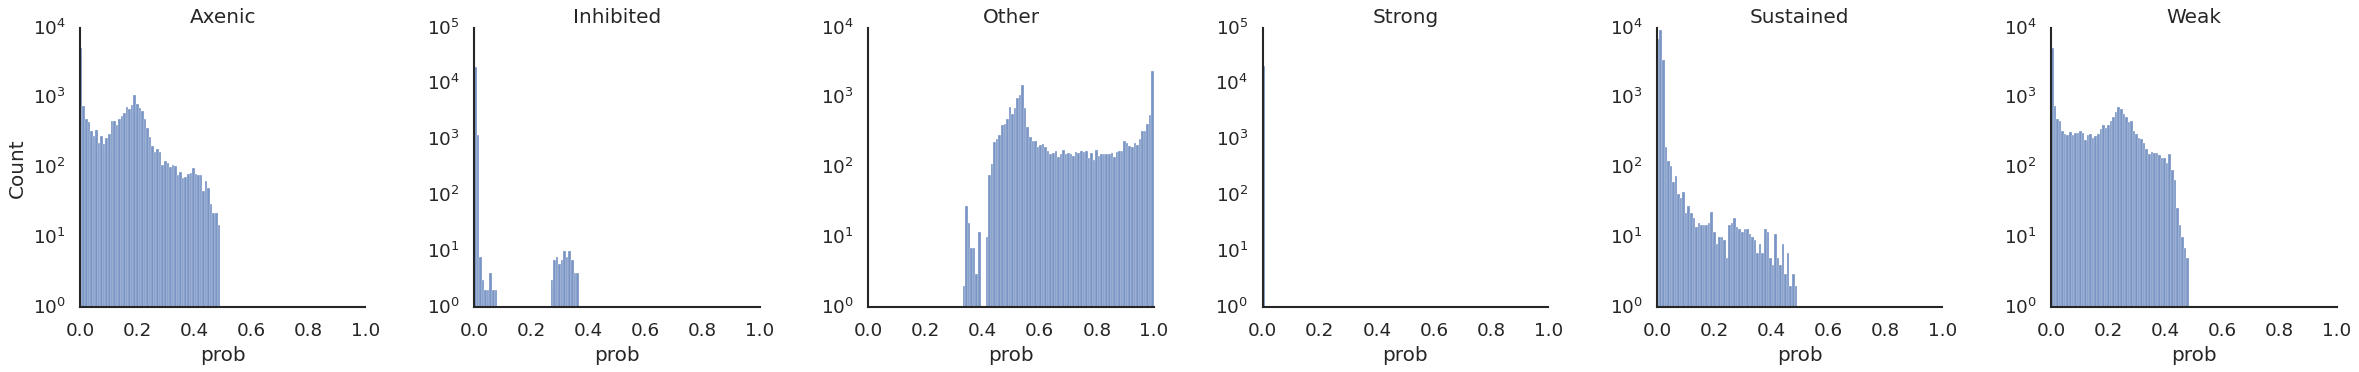

In [122]:
mdf_predicted_prob = df_predicted_prob.melt(
    id_vars=['run_id','y_pred', 'max_prob'], 
    value_vars=stack.classes_, 
    value_name='prob', var_name='Group')
g = sns.displot(
    data=mdf_predicted_prob.loc[mdf_predicted_prob.y_pred.isin(['Other'])], # & mdf_predicted_prob.max_prob.le(0.5)],
    x='prob', 
    col='Group', #col_wrap=3, #hue='model', multiple='stack', 
    facet_kws=dict(sharey=False, ),
    #row='model',

)
g.set_titles(col_template='{col_name}')
g.set(yscale='log')

In [123]:
df_predicted_classes = pd.DataFrame({
    'run_id' : X_sim.index,
    'y_pred' : y_sim_pred,
    'max_prob' : max_sim_prob,
})
df_predicted_classes

,run_id,y_pred,max_prob
0,monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYM...,Other,0.820828
1,monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYM...,Other,0.893862
2,monte4_EXOENZYME_100_monte_vpro_3135_EXOENZYME...,Weak,0.954135
3,monte4_EXOENZYME_100_monte_vpro_3143_EXOENZYME...,Axenic,0.767809
4,monte4_EXOENZYME_100_monte_vpro_3147_EXOENZYME...,Other,0.624215
...,...,...,...
42673,monte4_ROS_9_monte_vpro_4197_ROS_12_lowN_all_R...,Weak,0.949512
42674,monte4_ROS_9_monte_vpro_4434_ROS_13_lowN_all_R...,Other,0.543690
42675,monte4_ROS_9_monte_vpro_4538_ROS_1_lowN_all_RO...,Other,0.607851
42676,monte4_ROS_9_monte_vpro_4738_ROS_2_lowN_all_RO...,Axenic,0.738790


In [124]:
df_predicted_classes[['idx', 'media', 'which', 'model', 'hash']] = df_predicted_classes.run_id.str.rsplit('_', n=4, expand=True)


In [125]:
class_meta_df  = refdf[['id', 'full name', 'Group']].value_counts().reset_index()

In [126]:
df_predicted_classes

,run_id,y_pred,max_prob,idx,media,which,model,hash
0,monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYM...,Other,0.820828,monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYM...,lowN,all,EXOENZYME,h1628948357718170805
1,monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYM...,Other,0.893862,monte4_EXOENZYME_100_monte_vpro_31007_EXOENZYM...,lowN,all,EXOENZYME,h1628948357718170805
2,monte4_EXOENZYME_100_monte_vpro_3135_EXOENZYME...,Weak,0.954135,monte4_EXOENZYME_100_monte_vpro_3135_EXOENZYME_37,lowN,all,EXOENZYME,h1628948357718170805
3,monte4_EXOENZYME_100_monte_vpro_3143_EXOENZYME...,Axenic,0.767809,monte4_EXOENZYME_100_monte_vpro_3143_EXOENZYME_43,lowN,all,EXOENZYME,h1628948357718170805
4,monte4_EXOENZYME_100_monte_vpro_3147_EXOENZYME...,Other,0.624215,monte4_EXOENZYME_100_monte_vpro_3147_EXOENZYME_23,lowN,all,EXOENZYME,h1628948357718170805
...,...,...,...,...,...,...,...,...
42673,monte4_ROS_9_monte_vpro_4197_ROS_12_lowN_all_R...,Weak,0.949512,monte4_ROS_9_monte_vpro_4197_ROS_12,lowN,all,ROS,h5853139000967720769
42674,monte4_ROS_9_monte_vpro_4434_ROS_13_lowN_all_R...,Other,0.543690,monte4_ROS_9_monte_vpro_4434_ROS_13,lowN,all,ROS,h5853139000967720769
42675,monte4_ROS_9_monte_vpro_4538_ROS_1_lowN_all_RO...,Other,0.607851,monte4_ROS_9_monte_vpro_4538_ROS_1,lowN,all,ROS,h5853139000967720769
42676,monte4_ROS_9_monte_vpro_4738_ROS_2_lowN_all_RO...,Axenic,0.738790,monte4_ROS_9_monte_vpro_4738_ROS_2,lowN,all,ROS,h5853139000967720769


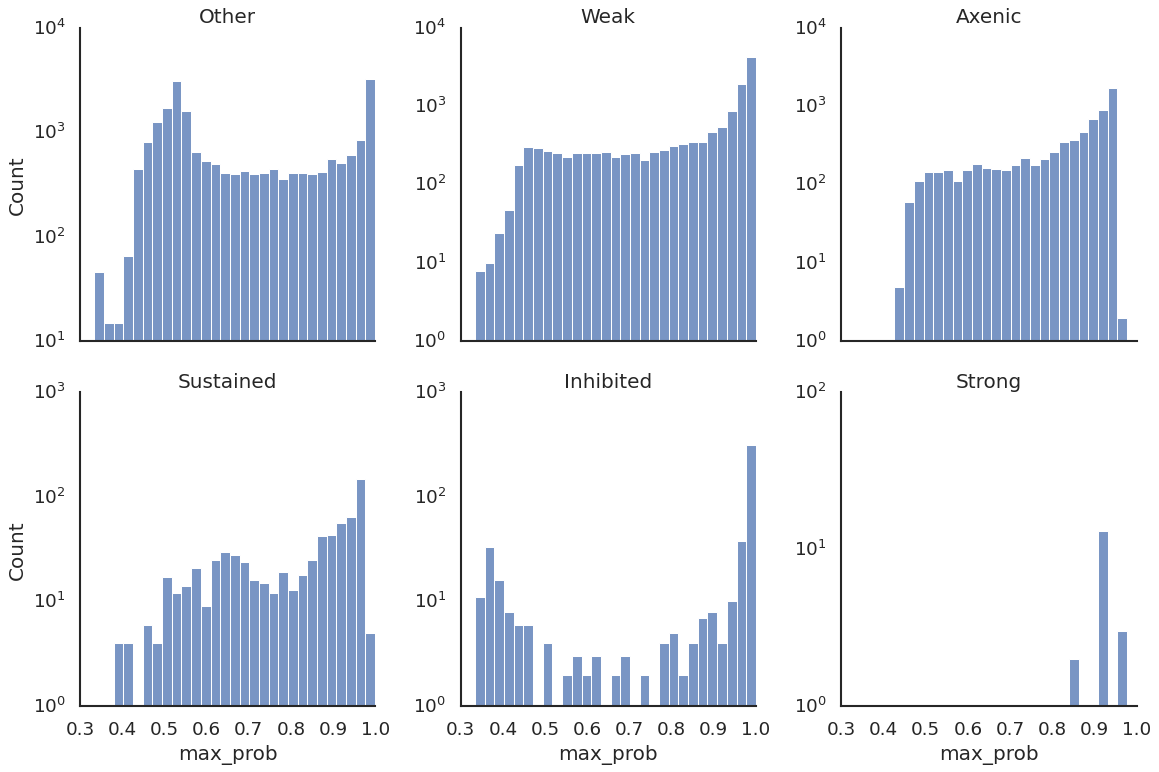

In [127]:
g = sns.displot(
    data=df_predicted_classes,
    x='max_prob', 
    col='y_pred', col_wrap=3, #hue='model', multiple='stack', 
    facet_kws=dict(sharey=False, ),
    #row='model',

)
g.set_titles(col_template='{col_name}')
g.set(yscale='log')

In [128]:
df_predicted_classes.y_pred.value_counts()

Other        20980
Weak         13432
Axenic        7067
Sustained      675
Inhibited      504
Strong          20
Name: y_pred, dtype: int64

In [129]:
np.unique(y_test, return_counts=True)

(array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
       dtype=object),
 array([  9,  18, 404,   9,   3,   3]))

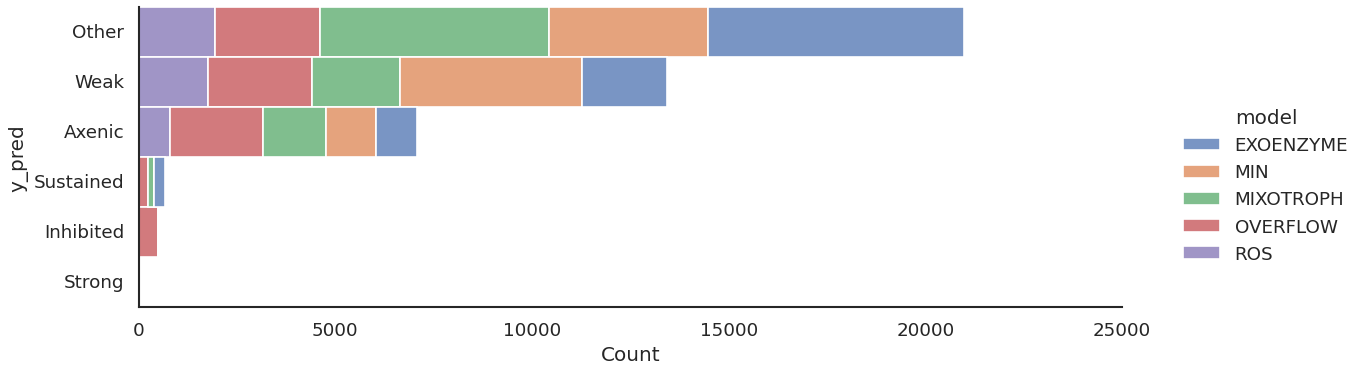

In [130]:
g = sns.displot(
    data=df_predicted_classes.reset_index(),
    #x='max_prob', 
    y='y_pred', hue='model', #dodge=False,
    #kind='count',
    multiple='stack',
    #legend=False,
    aspect=3,
)
#g.set_titles(col_template='{col_name}')
# g.set(xscale='log')

In [131]:
sample_ids = df_predicted_classes.groupby('y_pred').run_id.sample(50, replace=True)

In [132]:
sample_df = sim_df.loc[sim_df.run_id.isin(sample_ids)]
sample_df = sample_df.merge(df_predicted_classes, on='run_id', how='left')
sample_df

,run_id,day,ref_Bp[N],ref_Bp[C],y_pred,max_prob,idx,media,which,model,hash
0,monte4_MIN_27_monte_vpro_3406_MIN_65_lowN_all_...,0.000000,8.928571e-01,5.915179e+00,Weak,0.890148,monte4_MIN_27_monte_vpro_3406_MIN_65,lowN,all,MIN,h2914781599285612379
1,monte4_MIN_27_monte_vpro_3406_MIN_65_lowN_all_...,1.081944,2.460765e+00,1.417281e+01,Weak,0.890148,monte4_MIN_27_monte_vpro_3406_MIN_65,lowN,all,MIN,h2914781599285612379
2,monte4_MIN_27_monte_vpro_3406_MIN_65_lowN_all_...,2.164583,5.763906e+00,3.318450e+01,Weak,0.890148,monte4_MIN_27_monte_vpro_3406_MIN_65,lowN,all,MIN,h2914781599285612379
3,monte4_MIN_27_monte_vpro_3406_MIN_65_lowN_all_...,2.747222,9.103678e+00,5.243184e+01,Weak,0.890148,monte4_MIN_27_monte_vpro_3406_MIN_65,lowN,all,MIN,h2914781599285612379
4,monte4_MIN_27_monte_vpro_3406_MIN_65_lowN_all_...,3.754167,1.995487e+01,1.154044e+02,Weak,0.890148,monte4_MIN_27_monte_vpro_3406_MIN_65,lowN,all,MIN,h2914781599285612379
...,...,...,...,...,...,...,...,...,...,...,...
19383,monte4_ROS_84_monte_vpro_4901_ROS_31_lowN_all_...,110.943750,2.558878e-10,2.449648e-09,Weak,0.977755,monte4_ROS_84_monte_vpro_4901_ROS_31,lowN,all,ROS,h5853139000967720769
19384,monte4_ROS_84_monte_vpro_4901_ROS_31_lowN_all_...,115.845833,7.686660e-11,7.358529e-10,Weak,0.977755,monte4_ROS_84_monte_vpro_4901_ROS_31,lowN,all,ROS,h5853139000967720769
19385,monte4_ROS_84_monte_vpro_4901_ROS_31_lowN_all_...,118.788889,3.733862e-11,3.574459e-10,Weak,0.977755,monte4_ROS_84_monte_vpro_4901_ROS_31,lowN,all,ROS,h5853139000967720769
19386,monte4_ROS_84_monte_vpro_4901_ROS_31_lowN_all_...,121.777778,1.793475e-11,1.716899e-10,Weak,0.977755,monte4_ROS_84_monte_vpro_4901_ROS_31,lowN,all,ROS,h5853139000967720769


In [133]:
refdf

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted,train_Group
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845,10CC,NaN,NaN,NaN,NaN,NaN,Weak
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514,10CC,NaN,NaN,NaN,NaN,NaN,Weak
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332,10CC,NaN,NaN,NaN,NaN,NaN,Weak
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685,10CC,NaN,NaN,NaN,NaN,NaN,Weak
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483,10CC,NaN,NaN,NaN,NaN,NaN,Weak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56940,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,6917400.0,80.062500,0.005,0.117251,0.776791,Axenic_media,NaN,NaN,ctrl,lowP(1:50),131321.579908,Other
56941,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7251600.0,83.930556,-0.005,-0.117251,-0.776791,Axenic_media,NaN,NaN,ctrl,lowP(1:50),-131321.579908,Other
56942,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7412820.0,85.796528,0.010,0.234503,1.553581,Axenic_media,NaN,NaN,ctrl,lowP(1:50),262643.159815,Other
56943,Ax_Media_D64,ctrl_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_ctrl_lowP(1:50),Axenic_Other,7942080.0,91.922222,0.038,0.891111,5.903609,Axenic_media,NaN,NaN,ctrl,lowP(1:50),998044.007298,Other


In [134]:
refdf = add_log_cols(refdf, 'ref_Bp')

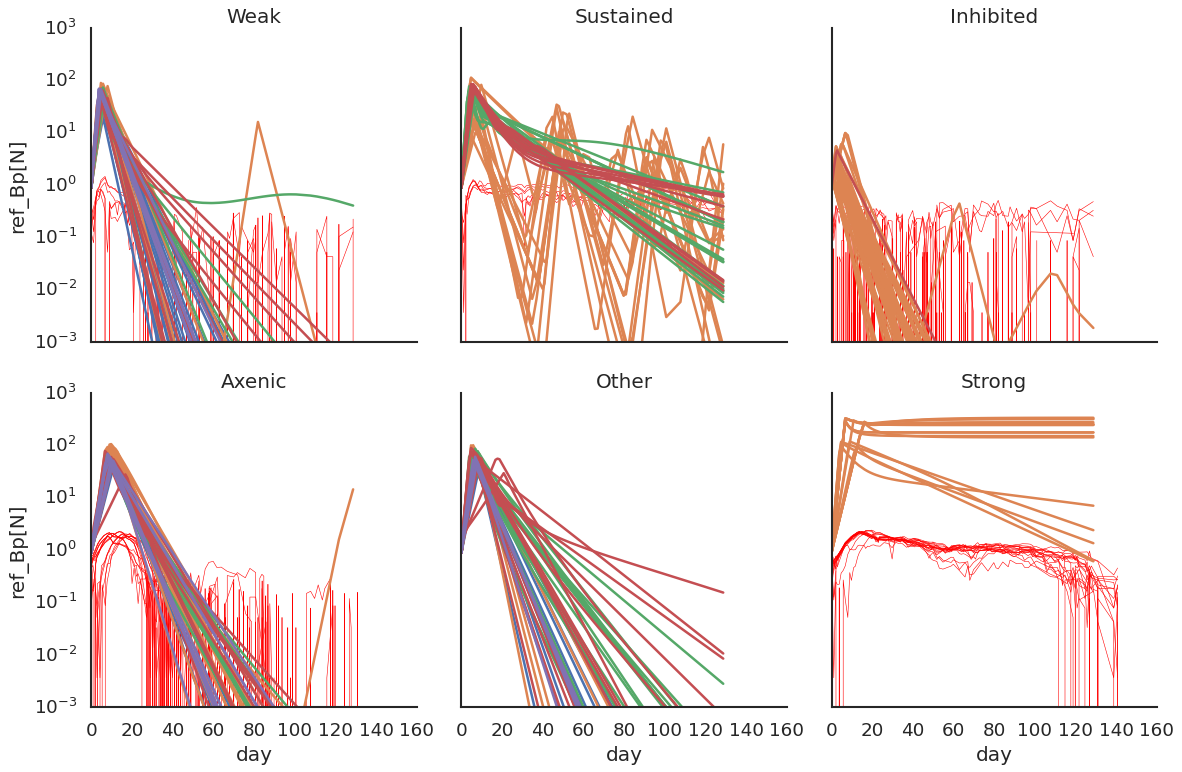

In [143]:
    g = sns.relplot(
        data=sample_df,
        kind='line', 
        estimator=None, units='run_id',
        hue='model',
        x='day', y=f'ref_Bp[N]', 
        col='y_pred', col_wrap=3,
        #facet_kws=dict( margin_titles=True),
        legend=False
    )
    for (col_val), ax in g.axes_dict.items():
        if col_val != 'Other':
            sns.lineplot(
                data=refdf.loc[refdf['train_Group'].isin([col_val])],
                x='day', y='log_Nbiomass',
            units='Sample', estimator=None, ax=ax, lw=0.5, color='red',
                zorder=-1,

                         legend=False
                        )
    g.set(yscale='log')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

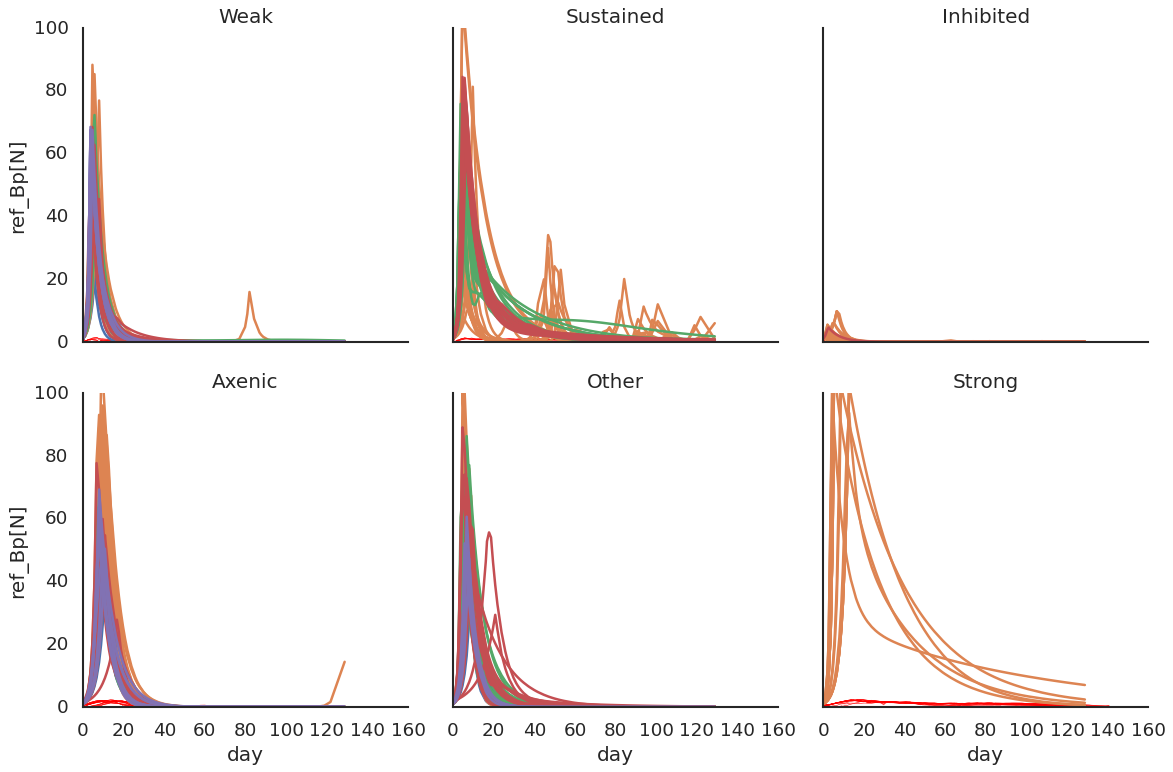

In [136]:
    g = sns.relplot(
        data=sample_df,
        kind='line', 
        estimator=None, units='run_id',
        hue='model',
        x='day', y=f'ref_Bp[N]', 
        col='y_pred', col_wrap=3,
        #facet_kws=dict( margin_titles=True),
        legend=False
    )
    for (col_val), ax in g.axes_dict.items():
        if col_val != 'Other':
            sns.lineplot(
                data=refdf.loc[refdf['train_Group'].isin([col_val])],
                x='day', y='log_Nbiomass',
            units='Sample', estimator=None, ax=ax, lw=0.5, color='red',
                zorder=-1,

                         legend=False
                        )
    #g.set(yscale='log')
    g.set(ylim=(0,100))
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

In [144]:
psim_feature_df.columns

Index(['max_Nday', 'max_Nbiomass', 'max_Cday', 'max_Cbiomass', 'mean_Nbiomass',
       'std_Nbiomass', 'median_Nbiomass', 'mean_Cbiomass', 'std_Cbiomass',
       'median_Cbiomass', 'last_dayN', 'last_dayC'],
      dtype='object')

In [138]:
list(zip(*np.unique(y_sim_pred, return_counts=True)))

[('Axenic', 7067),
 ('Inhibited', 504),
 ('Other', 20980),
 ('Strong', 20),
 ('Sustained', 675),
 ('Weak', 13432)]

In [139]:
stack.classes_

array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
      dtype=object)

In [140]:
refdf[['id', 'Group']].value_counts()

id               Group       
all_all          Other           1338
MED4_DE          Strong          1338
MED4_DE1         Strong          1338
MED4_1A3         Strong          1208
MED4_BS11        Strong          1129
                                 ... 
SB_lowP(1:50)    Axenic_Other     156
SB_lowP(1:8)     Axenic_Other     156
9202_lowP(1:8)   Axenic_Other     156
9202_lowP(1:50)  Axenic_Other     156
MIT0604_Ax_Pro   Axenic_Other      88
Length: 108, dtype: int64

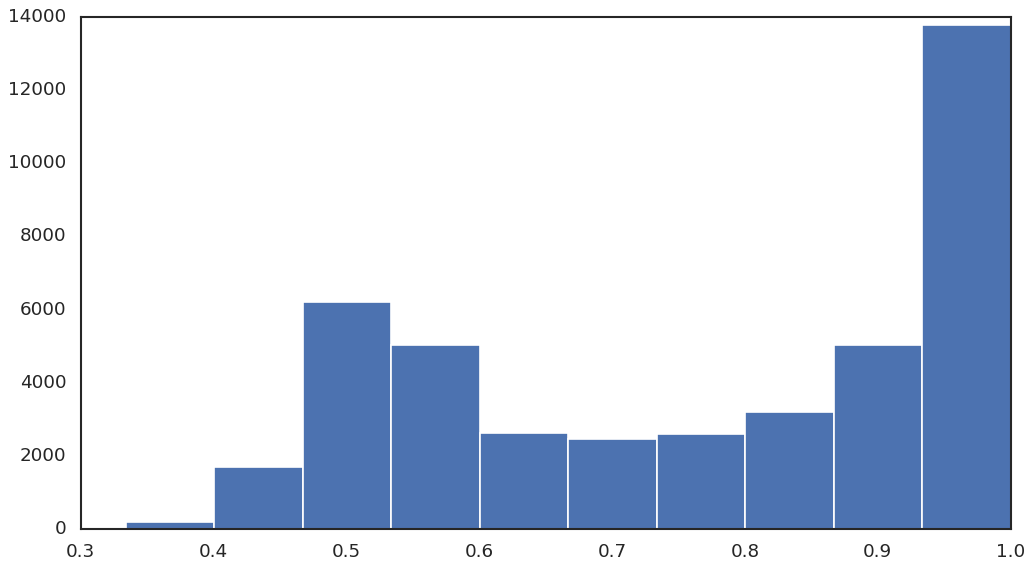

In [141]:
plt.hist(max_sim_prob)  
plt.show()

In [142]:
max_sim_prob.shape

(42678,)